# Uso de este cuaderno

Primeramente se ejecuta el preprocesamiento de datos depsues se elige las variables que se quieran probar y luego el modelo.  
En la sección "Carga de datos" de este mismo cuaderno se pueden obtener los datos preprocesados para no tener que ejecutar la sección otra vez (la carga se hace desde un archivo .pkl que tiene que estar en la misma carpeta que este cuaderno), esto facilita el uso en cuanto a tiempo.   


Cada modelo está guardado en su respectivo archivo .pkl(su ubicación tiene que ser la misma que este cuaderno jupiter) el cual ya esta entrenado, esto sirve para no tener que ejecutar otra vez el entrenamiento de los modelos. La carga de cada modelo se puede encontrar en su correspondiente sección.  
Por ejempo, para ejecutar un modelo de regresión logística hay que ejecutar la celda de Importaciones, luego cargar los datos (sección "Carga de datos") y tras esto ejecutar la celda de Selección de variables (se elige qué se va a meter en el modelo: metricas, textos, titulos o una combinación de los anteriores), luego ir a Modelos Machine learning, buscar la sección Regresión logística y ejecutar la sección de "Guardado y carga del modelo" y "predicción y evaluación".  
Resumen de ejecución del ejemplo:
* Importaciones
* Carga de datos
* Selección de variables
* Guardado y carga del modelo
* Predicción y evaluación

# Preprocesamiento de los datos

## Importaciones

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import recall_score

from tensorflow import keras
from keras.models import Model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import TextVectorization, Input, Embedding, Flatten, Concatenate,MultiHeadAttention, LayerNormalization, Dense, Dropout, Add, Concatenate

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

import joblib
import pickle
# import spacy



from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)


# RANDOM SEED o RANDOM STATE
##### Se establece una semilla para que la separación de grupo de train test y el resultado de los modelos den siempre el mismo resultado #####

# Se usa RandomState de numpy pues un random.seed() no funciona con los modelos. Información obtenida de la siguiente fuente https://stackoverflow.com/questions/40750394/how-to-seed-the-random-number-generator-for-scikit-learn
from numpy.random import RandomState
RandomState(42)

# Se usa el parámetro random_state de los modelos en vez de RandomState de numpy
# En la redes neuronales sí se usa

RandomState(MT19937) at 0x781A9CBB5140

## Carga y comprobación de los datos

In [ ]:
df_noticias = pd.read_csv("data/Noticias_sin_duplicados.csv", sep='|')
print(df_noticias.shape)
df_noticias.head(3)

(6008, 19)


,id_noticia,cont_titulo,cont_texto,compartir_tiempo,real_fake,autor,fuente,visitas,compartir,duracion,favorito,pais,idioma,tiempo,tipo,real_fake_integer,real_fake_bool,tiempo_encode,tiempo_comparticion_encode
0,10,Scalia’s death comes just a month before the c...,The unexpected death of Justice Antonin Scalia...,2022-09-08 14:00:00,REAL,Zoe Lee,The Insight,24881,59275,558,5035,Philippines,English,2022-09-07 13:00:00,Entrevista,0,False,540000,630000
1,100,Rachel Dolezal's brother: She's 'making up mor...,(CNN) Ezra Dolezal would love to see his siste...,2022-09-18 00:00:00,REAL,Nora Patel,Newsline,737334,60949,279,9823,Italy,English,2022-09-08 17:00:00,Reportaje especial,0,False,640800,1443600
2,10001,What A Hillary Presidency Would Bring,"Behind the headlines - conspiracies, cover-ups...",2022-09-24 07:00:00,FAKE,Grace Liu,Newsline,563200,10094,432,5226,Egypt,English,2022-09-11 11:00:00,Reseña,1,True,878400,1987200


In [ ]:
df_noticias[df_noticias['cont_titulo'].isna()]

,id_noticia,cont_titulo,cont_texto,compartir_tiempo,real_fake,autor,fuente,visitas,compartir,duracion,favorito,pais,idioma,tiempo,tipo,real_fake_integer,real_fake_bool,tiempo_encode,tiempo_comparticion_encode


In [ ]:
df_noticias['real_fake'].value_counts()

,count
real_fake,
FAKE,3023
REAL,2985


In [ ]:
print(df_noticias.columns.to_list())

['id_noticia', 'cont_titulo', 'cont_texto', 'compartir_tiempo', 'real_fake', 'autor', 'fuente', 'visitas', 'compartir', 'duracion', 'favorito', 'pais', 'idioma', 'tiempo', 'tipo', 'real_fake_integer', 'real_fake_bool', 'tiempo_encode', 'tiempo_comparticion_encode']


In [ ]:
# df_noticias.drop(columns=['anio_publicacion', 'mes_publicacion', 'dia_publicacion','hora_publicacion', 'anio_comparticion', 'mes_comparticion','dia_comparticion', 'hora_comparticion','real_fake_bool'], inplace=True)

In [ ]:
print(df_noticias.columns.to_list())

['id_noticia', 'cont_titulo', 'cont_texto', 'compartir_tiempo', 'real_fake', 'autor', 'fuente', 'visitas', 'compartir', 'duracion', 'favorito', 'pais', 'idioma', 'tiempo', 'tipo', 'real_fake_integer', 'real_fake_bool', 'tiempo_encode', 'tiempo_comparticion_encode']


In [ ]:
# # Tarda bastante, se deja comentado para agilizar la preparación de los datos
# plt.figure(figsize=(20,20))
# sns.pairplot(df_noticias, hue='real_fake_integer', palette='mako')
# plt.show()

### Correlación

In [ ]:
# Correlación con id_noticia
df_noticias.corr(numeric_only=True)

,id_noticia,visitas,compartir,duracion,favorito,real_fake_integer,real_fake_bool,tiempo_encode,tiempo_comparticion_encode
id_noticia,1.000000,-0.005412,-0.010709,-0.018542,-0.004277,0.001033,0.001033,-0.005414,-0.020658
visitas,-0.005412,1.000000,-0.000165,-0.014619,0.004099,-0.015181,-0.015181,-0.004344,0.001712
compartir,-0.010709,-0.000165,1.000000,0.013845,0.021608,0.016228,0.016228,-0.004243,0.003586
duracion,-0.018542,-0.014619,0.013845,1.000000,-0.002121,0.001092,0.001092,-0.000067,-0.009760
favorito,-0.004277,0.004099,0.021608,-0.002121,1.000000,-0.012782,-0.012782,-0.009152,0.019639
real_fake_integer,0.001033,-0.015181,0.016228,0.001092,-0.012782,1.000000,1.000000,0.019302,0.010827
real_fake_bool,0.001033,-0.015181,0.016228,0.001092,-0.012782,1.000000,1.000000,0.019302,0.010827
tiempo_encode,-0.005414,-0.004344,-0.004243,-0.000067,-0.009152,0.019302,0.019302,1.000000,0.028272
tiempo_comparticion_encode,-0.020658,0.001712,0.003586,-0.009760,0.019639,0.010827,0.010827,0.028272,1.000000


No se mete id_noticias en los modelos pues no tiene sentido, además desvirtua mucho los resultados porque esta muy correlado con la variable objetivo (real_fake)

In [ ]:
df_noticias[['real_fake', 'real_fake_integer']].head()

,real_fake,real_fake_integer
0,REAL,0
1,REAL,0
2,FAKE,1
3,FAKE,0
4,FAKE,1


In [ ]:
corr = df_noticias.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,id_noticia,visitas,compartir,duracion,favorito,real_fake_integer,real_fake_bool,tiempo_encode,tiempo_comparticion_encode
id_noticia,1.000000,-0.005412,-0.010709,-0.018542,-0.004277,0.001033,0.001033,-0.005414,-0.020658
visitas,-0.005412,1.000000,-0.000165,-0.014619,0.004099,-0.015181,-0.015181,-0.004344,0.001712
compartir,-0.010709,-0.000165,1.000000,0.013845,0.021608,0.016228,0.016228,-0.004243,0.003586
duracion,-0.018542,-0.014619,0.013845,1.000000,-0.002121,0.001092,0.001092,-0.000067,-0.009760
favorito,-0.004277,0.004099,0.021608,-0.002121,1.000000,-0.012782,-0.012782,-0.009152,0.019639
real_fake_integer,0.001033,-0.015181,0.016228,0.001092,-0.012782,1.000000,1.000000,0.019302,0.010827
real_fake_bool,0.001033,-0.015181,0.016228,0.001092,-0.012782,1.000000,1.000000,0.019302,0.010827
tiempo_encode,-0.005414,-0.004344,-0.004243,-0.000067,-0.009152,0.019302,0.019302,1.000000,0.028272
tiempo_comparticion_encode,-0.020658,0.001712,0.003586,-0.009760,0.019639,0.010827,0.010827,0.028272,1.000000


## Codificación  
Df codificado con métricas, fechas luego se añaden las variables categóricas con One Hot encoder y los textos se tokenizan, variable objetivo se deja fuera en un array.   
Cuantas más variables se metan en los modelos, más tiempo se tarda en entrenar.

In [ ]:
lb = LabelBinarizer()

# Se crea df_codificado vacío
df_codificado = pd.DataFrame()


# Textos
df_codificado['cont_texto'] = df_noticias['cont_texto']
df_codificado['cont_titulo'] = df_noticias['cont_titulo']


# Métricas
df_codificado['visitas'] = df_noticias['visitas']
df_codificado['compartir'] = df_noticias['compartir']
df_codificado['duracion'] = df_noticias['duracion']
df_codificado['favorito'] = df_noticias['favorito']
df_codificado['tiempo_encode'] = df_noticias['tiempo_encode']
df_codificado['tiempo_comparticion_encode'] = df_noticias['tiempo_comparticion_encode']


# Variable objetivo
y = pd.DataFrame(lb.fit_transform(df_noticias['real_fake']), columns=['real_fake'])

print(f"Tipo de dato de y : {type(y)}")
# print(df_codificado.shape)
# print(df_codificado.columns)
display(df_codificado.head(3))
display(y)

Tipo de dato de y : <class 'pandas.core.frame.DataFrame'>


,cont_texto,cont_titulo,visitas,compartir,duracion,favorito,tiempo_encode,tiempo_comparticion_encode
0,The unexpected death of Justice Antonin Scalia...,Scalia’s death comes just a month before the c...,24881,59275,558,5035,540000,630000
1,(CNN) Ezra Dolezal would love to see his siste...,Rachel Dolezal's brother: She's 'making up mor...,737334,60949,279,9823,640800,1443600
2,"Behind the headlines - conspiracies, cover-ups...",What A Hillary Presidency Would Bring,563200,10094,432,5226,878400,1987200


,real_fake
0,1
1,1
2,0
3,0
4,0
...,...
6003,1
6004,0
6005,0
6006,0


In [ ]:
# One Hot Encoding para variables categóricas
ohe = OneHotEncoder()


# Autor
X_autor = df_noticias['autor'].values.reshape(-1, 1)
ohe_autor = ohe.fit_transform(X_autor).toarray()

# Fuente
X_fuente = df_noticias['fuente'].values.reshape(-1, 1)
ohe_fuente = ohe.fit_transform(X_fuente).toarray()

# Pais
X_pais = df_noticias['pais'].values.reshape(-1, 1)
ohe_pais = ohe.fit_transform(X_pais).toarray()

# # Idioma
# X_idioma = df_noticias['idioma'].values.reshape(-1, 1)
# ohe_idioma = ohe.fit_transform(X_idioma).toarray()

# Tipo
X_tipo = df_noticias['tipo'].values.reshape(-1, 1)
ohe_tipo = ohe.fit_transform(X_tipo).toarray()



########### Unir los ohe al df_codificado ############

df_autor = pd.DataFrame(ohe_autor, columns=df_noticias['autor'].unique())
df_codificado = pd.concat([df_codificado,df_autor], axis=1)

df_fuente = pd.DataFrame(ohe_fuente, columns=df_noticias['fuente'].unique())
df_codificado = pd.concat([df_codificado,df_fuente], axis=1)

df_pais = pd.DataFrame(ohe_pais, columns=df_noticias['pais'].unique())
df_codificado = pd.concat([df_codificado,df_pais], axis=1)

# df_idioma = pd.DataFrame(ohe_idioma, columns=df_noticias['idioma'].unique())
# df_codificado = pd.concat([df_codificado,df_idioma], axis=1)

df_tipo = pd.DataFrame(ohe_tipo, columns=df_noticias['tipo'].unique())
df_codificado = pd.concat([df_codificado,df_tipo], axis=1)

print(df_codificado.shape)
display(df_codificado.head(3))

(6008, 132)


,cont_texto,cont_titulo,visitas,compartir,duracion,favorito,tiempo_encode,tiempo_comparticion_encode,Zoe Lee,Nora Patel,...,Reportaje,Carta al editor,Análisis,Noticia destacada,Columna de humor,Crónica,Noticia internacional,Columna,Entrevista exclusiva,Noticia local
0,The unexpected death of Justice Antonin Scalia...,Scalia’s death comes just a month before the c...,24881,59275,558,5035,540000,630000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,(CNN) Ezra Dolezal would love to see his siste...,Rachel Dolezal's brother: She's 'making up mor...,737334,60949,279,9823,640800,1443600,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,"Behind the headlines - conspiracies, cover-ups...",What A Hillary Presidency Would Bring,563200,10094,432,5226,878400,1987200,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Separación de los datos en grupo de train y test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_codificado, y, test_size=.15, random_state=32)


print(type(X_train))
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print()
print("X_test",X_test.shape)
print("y_test",y_test.shape)

<class 'pandas.core.frame.DataFrame'>
X_train (5106, 132)
y_train (5106, 1)

X_test (902, 132)
y_test (902, 1)


In [ ]:
X_train.head(3)

,cont_texto,cont_titulo,visitas,compartir,duracion,favorito,tiempo_encode,tiempo_comparticion_encode,Zoe Lee,Nora Patel,...,Reportaje,Carta al editor,Análisis,Noticia destacada,Columna de humor,Crónica,Noticia internacional,Columna,Entrevista exclusiva,Noticia local
5607,The FBI is now actively and aggressively probi...,The Clinton FBI Investigation Just Got Real,1701,44912,582,973,1922400,986400,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3818,Rep. Paul Ryan must step down as Speaker of th...,Paul Ryan Must Step Down as Speaker of the House,390182,53239,711,3792,1530000,1724400,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4102,What Does Victory Mean For NATO? NPR. Charles ...,Links 11/12/16,328215,32353,372,1373,914400,1807200,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Comprobación balance variable objetivo
print(y_train.value_counts())
print(y_test.value_counts())

real_fake
0            2554
1            2552
Name: count, dtype: int64
real_fake
0            469
1            433
Name: count, dtype: int64


## Comprobación de longitud de palabras y vocabulario

### Textos

In [ ]:
###### Comprobación de la longtud maxima y vocabulario de los textos en 'cont_texto' de X_train ######

vectorize_layer_textos = TextVectorization(
    standardize="lower_and_strip_punctuation",
    output_mode='int'
)
vectorize_layer_textos.adapt(X_train['cont_texto'].values)
textos_tokenizados = vectorize_layer_textos(X_train['cont_texto'].values)


longitud_maxima_textos = textos_tokenizados.shape[1]
longitu_maxima_vocabulario = vectorize_layer_textos.vocabulary_size()
vocabulario_textos = vectorize_layer_textos.get_vocabulary()

print(textos_tokenizados.shape)
print(textos_tokenizados)

print(f"Longitud de palabras máxima {longitud_maxima_textos}")
print(f"Cantidad palabras en el vocabulario {longitu_maxima_vocabulario}")


## Comprobación de las palabras que han sido tokenizadas

# for i, text in enumerate(df_prueba['cont_texto']):
#     # print(f"Texto original: {text}")
#     token_ids = textos_tokenizados[i].numpy()
#     tokens = [vocab[token_id] for token_id in token_ids if token_id < len(vocab)]
#     print(f"Palabras tokenizadas: {tokens}\n")

(5106, 20457)
tf.Tensor(
[[    2   221     9 ...     0     0     0]
 [  868   414   683 ...     0     0     0]
 [   51   191   509 ...     0     0     0]
 ...
 [ 2407   586    31 ...     0     0     0]
 [35460  9146     6 ...     0     0     0]
 [  278    25    89 ...     0     0     0]], shape=(5106, 20457), dtype=int64)
Longitud de palabras máxima 20457
Cantidad palabras en el vocabulario 76671


In [ ]:
# Siendo el tamaño del vocabulario de 76671 se escoge un max_features de 10000
max_features_textos = 10000

In [ ]:
# Una forma de contar las palabras por registro
numero_palabras = np.count_nonzero(textos_tokenizados, axis = 1)
print(numero_palabras)
print()

# Otra frma de contar la cantidad de palabras en cada secuencia tokenizada
df = pd.DataFrame()

longitudes_textos = tf.reduce_sum(tf.cast(textos_tokenizados > 0, tf.int32), axis=1)
df['cantidad_palabras_textos'] = longitudes_textos.numpy()
print(df['cantidad_palabras_textos'])
print(len(longitudes_textos))

[149 246 636 ... 262 322 987]

0        149
1        246
2        636
3        455
4        297
        ... 
5101     918
5102    1323
5103     262
5104     322
5105     987
Name: cantidad_palabras_textos, Length: 5106, dtype: int32
5106


Mediana: 614.0
Media 791.8419506462985


<Axes: >

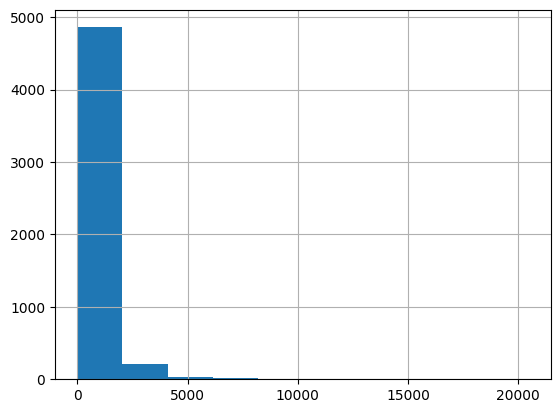

In [ ]:
print("Mediana:",df['cantidad_palabras_textos'].median())
print("Media",df['cantidad_palabras_textos'].mean())
df['cantidad_palabras_textos'].hist()

In [ ]:
# Se crea sequence_legth
# Comprobación del balance de ese % de registros con mayor cantidad de palabras que el quantil especficado

cuantil = 0.60
sequence_length_textos = int(df['cantidad_palabras_textos'].quantile(cuantil))
print(f"Valor del cuantil {cuantil}: {sequence_length_textos}")

# Se crea una columna con la cantidad de palabras de la columna cont_texto que hay en cada registro
df_noticias['cantidad_palabras_textos'] = df['cantidad_palabras_textos']

# Se filtra ese % de registros que tienen mayor cantidad de palabras
registros_mayor_cantidad_palabras = df_noticias[df_noticias['cantidad_palabras_textos'] > sequence_length_textos]

print(f"{len(registros_mayor_cantidad_palabras)} registros que se va a cortar su longitud")
display(registros_mayor_cantidad_palabras.groupby('real_fake').agg({'id_noticia':'count'}))

# Por último, se elimina la columna de apoyo, ya no hace falta
df_noticias.drop(columns='cantidad_palabras_textos', inplace=True)

Valor del cuantil 0.6: 759
2042 registros que se va a cortar su longitud


,id_noticia
real_fake,
FAKE,858
REAL,1184


### Titulos

In [ ]:
###### Comprobación de la longtud maxima y vocabulario de los textos en 'cont_texto' de X_train ######

vectorize_layer_titulos = TextVectorization(
    standardize="lower_and_strip_punctuation",
    output_mode='int'
)
vectorize_layer_titulos.adapt(X_train['cont_titulo'].values)
titulos_tokenizados = vectorize_layer_textos(X_train['cont_titulo'].values)


longitud_maxima_titulo = titulos_tokenizados.shape[1]
longitud_maxima_vocabulario = vectorize_layer_titulos.vocabulary_size()
vocabulario_titulos = vectorize_layer_titulos.get_vocabulary()


print(titulos_tokenizados.shape)
# print(titulos_tokenizados)

print(f"Longitud de palabras máxima {longitud_maxima_titulo}")
print(f"Cantidad palabras en el vocabulario {longitud_maxima_vocabulario}")
# print(f"Vocabulario de los titulos: {vocabulario_titulo}")



## Comprobación de las palabras que han sido tokenizadas

# for i, text in enumerate(df_prueba['cont_titulo']):
#     # print(f"Texto original: {text}")
#     token_ids = textos_tokenizados[i].numpy()
#     tokens = [vocab[token_id] for token_id in token_ids if token_id < len(vocab)]
#     print(f"Palabras tokenizadas: {tokens}\n")

(5106, 53)
Longitud de palabras máxima 53
Cantidad palabras en el vocabulario 10440


In [ ]:
# Se elige un max_features para los titulos
max_features_titulos = 2000

In [ ]:
# Una forma de contar las palabras por registro
numero_palabras = np.count_nonzero(titulos_tokenizados, axis = 1)
print(numero_palabras)
print()

# Otra frma de contar la cantidad de palabras en cada secuencia tokenizada
df = pd.DataFrame()

longitudes_titulos = tf.reduce_sum(tf.cast(titulos_tokenizados > 0, tf.int32), axis=1)
df['cantidad_palabras_titulos'] = longitudes_titulos.numpy()
print(df['cantidad_palabras_titulos'])
print(len(longitudes_titulos))

[ 7 10  2 ... 10  9 11]

0        7
1       10
2        2
3        9
4        8
        ..
5101    12
5102     4
5103    10
5104     9
5105    11
Name: cantidad_palabras_titulos, Length: 5106, dtype: int32
5106


Mediana: 10.0
Media 10.525851938895418


<Axes: >

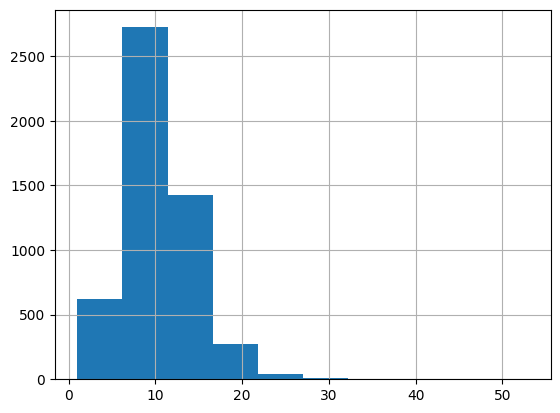

In [ ]:
print("Mediana:",df['cantidad_palabras_titulos'].median())
print("Media",df['cantidad_palabras_titulos'].mean())
df['cantidad_palabras_titulos'].hist()

In [ ]:
# Comprobación del balance de ese % de registros con mayor cantidad de palabras que el quantil especificado

cuantil = 0.50
sequence_length_titulos = int(df['cantidad_palabras_titulos'].quantile(cuantil))
print(f"Valor del cuantil {cuantil}: {sequence_length_titulos}")

# Se crea una columna con la cantidad de palabras de la columna cont_texto que hay en cada registro
df_noticias['cantidad_palabras_titulos'] = df['cantidad_palabras_titulos']

# Se filtra ese % de registros que tienen mayor cantidad de palabras
registros_mayor_cantidad_palabras_titulos = df_noticias[df_noticias['cantidad_palabras_titulos'] > sequence_length_titulos]

print(f"{len(registros_mayor_cantidad_palabras_titulos)} registros que se recorta su longitud")
display(registros_mayor_cantidad_palabras_titulos.groupby('real_fake').agg({'id_noticia':'count'}))

# Por último, se elimina la columna de apoyo, ya no hace falta
df_noticias.drop(columns='cantidad_palabras_titulos', inplace=True)

Valor del cuantil 0.5: 10
2302 registros que se recorta su longitud


,id_noticia
real_fake,
FAKE,991
REAL,1311


## Tokenización

### Textos

In [ ]:
# Tokenización
vectorize_layer_textos = TextVectorization(
    standardize="lower_and_strip_punctuation",
    max_tokens=max_features_textos,
    output_mode="int",
    output_sequence_length=sequence_length_textos,
)
vectorize_layer_textos.adapt(X_train['cont_texto'])


X_train_texto = vectorize_layer_textos(X_train['cont_texto'])
X_test_texto = vectorize_layer_textos(X_test['cont_texto'])


print(f"max_features {max_features_textos}")
print(f"sequence_length {sequence_length_textos}")

X_train_texto

max_features 10000
sequence_length 759


<tf.Tensor: shape=(5106, 759), dtype=int64, numpy=
array([[   2,  221,    9, ...,    0,    0,    0],
       [ 868,  414,  683, ...,    0,    0,    0],
       [  51,  191,  509, ...,    0,    0,    0],
       ...,
       [2407,  586,   31, ...,    0,    0,    0],
       [   1, 9146,    6, ...,    0,    0,    0],
       [ 278,   25,   89, ...,    4,    2, 3617]])>

### Titulos

In [ ]:
# Tokenización
vectorize_layer_textos = TextVectorization(
    standardize="lower_and_strip_punctuation",
    max_tokens=max_features_titulos,
    output_mode="int",
    output_sequence_length=sequence_length_titulos,
)
vectorize_layer_textos.adapt(X_train['cont_titulo'])


X_train_titulo = vectorize_layer_textos(X_train['cont_titulo'])
X_test_titulo = vectorize_layer_textos(X_test['cont_titulo'])


print(f"max_features {max_features_titulos}")
print(f"sequence_length {sequence_length_titulos}")

X_train_titulo

max_features 2000
sequence_length 10


<tf.Tensor: shape=(5106, 10), dtype=int64, numpy=
array([[   2,   12,   47, ...,    0,    0,    0],
       [ 115,  227,  180, ...,    5,    2,   50],
       [1336,    1,    0, ...,    0,    0,    0],
       ...,
       [   2,    1,    1, ...,  254,   61,    1],
       [ 181,    1,   20, ...,  776,    1,    0],
       [  89,    1,  412, ...,   93,    1,   28]])>

In [ ]:
X_train_titulo_comprobacion = pd.DataFrame(X_train_titulo)
X_train_titulo_comprobacion.isna().sum().sum()

0

## Embedding

In [ ]:
embedding_dim = 100

### Textos

In [ ]:
# Crear la entrada del modelo
input_text = Input(shape=(sequence_length_textos,))  # Entrada basada en las secuencias tokenizadas. Cantidad de columnas que tienen los textos tokenizados.

# Añadir la capa de Embedding
embedding = Embedding(input_dim=max_features_textos, output_dim=embedding_dim, mask_zero=True)(input_text)

# Aplanar la salida de la capa de Embedding
# flatten = Flatten()(embedding) # Funciona mejor globar average pooling 1d
# Tambien se puede hacer con Globar average pooling1d
global_avg_pooling_layer = tf.keras.layers.GlobalAveragePooling1D()(embedding)

# Crear el modelo
embedding_model = Model(inputs=input_text, outputs=global_avg_pooling_layer)

embedding_train_texto = embedding_model(X_train_texto)
embedding_test_texto = embedding_model(X_test_texto)


### Titulos

In [ ]:
# Crear la entrada del modelo
input_text = Input(shape=(sequence_length_titulos,))  # Entrada basada en las secuencias tokenizadas. Cantidad de columnas que tienen los textos tokenizados.

# Añadir la capa de Embedding
embedding = Embedding(input_dim=max_features_titulos, output_dim=embedding_dim)(input_text) # Se quita el parámetro mask_zero=True porque genera secuencias con nulos al encontrar titulos que se han tokenizado como solo 0

# Aplanar la salida de la capa de Embedding
# flatten = Flatten()(embedding) # Funciona mejor globar average pooling 1d
# Tambien se puede hacer con Globar average pooling1d
global_avg_pooling_layer = tf.keras.layers.GlobalAveragePooling1D()(embedding)

# Crear el modelo
embedding_model = Model(inputs=input_text, outputs=global_avg_pooling_layer)

embedding_train_titulo = embedding_model(X_train_titulo)
embedding_test_titulo = embedding_model(X_test_titulo)

## Metricas

In [ ]:
# Se eliminan las columna 'cont_texto' y 'cont_titulo' que eran necesarias en el proceso de tokeniación
X_train_metricas = X_train.drop(columns=['cont_texto', 'cont_titulo'])
X_test_metricas = X_test.drop(columns=['cont_texto', 'cont_titulo'])
# X_train_metricas.columns.tolist()

In [ ]:
X_train_metricas.shape

(5106, 130)

## Normalización

In [ ]:
# Normalización
min_max_scaler = MinMaxScaler()
scaler = RobustScaler()
s_scaler = StandardScaler()

# Recordar solo normalizar datos de entrada, la salida se quiere predecir sin normalizar

X_train_metricas = scaler.fit_transform(X_train_metricas)
X_test_metricas = scaler.transform(X_test_metricas)

X_train_texto = scaler.fit_transform(X_train_texto )
X_test_texto = scaler.transform(X_test_texto )

X_train_titulo = scaler.fit_transform(X_train_titulo )
X_test_titulo = scaler.transform(X_test_titulo )

# Al normalizar, convierte los dataframe en arrays de numpy
print(type(X_train))


print(y_train)
y_train = (y_train.values).ravel()
y_test = (y_test.values).ravel()
y_train

<class 'pandas.core.frame.DataFrame'>
      real_fake
5607          0
3818          0
4102          0
2372          1
3072          0
...         ...
4030          0
2940          1
1334          1
1579          1
2775          1

[5106 rows x 1 columns]


array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
X_train_metricas

array([[-1.00978997, -0.115507  ,  1.4       , ...,  0.        ,
         0.        ,  0.        ],
       [-0.23488843,  0.04958514,  1.9375    , ...,  0.        ,
         0.        ,  0.        ],
       [-0.35849377, -0.36450331,  0.525     , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.55229046, -0.6495435 , -0.925     , ...,  0.        ,
         0.        ,  0.        ],
       [-0.74511973,  0.6547776 ,  0.50833333, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.66877273, -0.24249333, -0.56666667, ...,  0.        ,
         0.        ,  0.        ]])

# Guardado de los datos preprocesados

Para no tener que ejecutar de nuevo todo el preprocesamiento o preparación de los datos.

In [ ]:
# Crear un diccionario con todos los objetos
datos_preprocesados = {
    'max_features_textos':max_features_textos,
    'sequence_length_textos':sequence_length_textos,
    'max_features_titulos':max_features_titulos,
    'sequence_length_titulos':sequence_length_titulos,
    'X_train_metricas':X_train_metricas,
    'X_test_metricas':X_test_metricas,
    'X_train_texto':X_train_texto,
    'X_test_texto':X_test_texto,
    'X_train_titulo':X_train_titulo,
    'X_test_titulo':X_test_titulo,
    'y_train':y_train,
    'y_test':y_test,
    'embedding_train_texto':embedding_train_texto,
    'embedding_train_titulo':embedding_train_titulo,
    'embedding_test_texto':embedding_test_texto,
    'embedding_test_titulo':embedding_test_titulo
}

# Guardar el diccionario
with open('data/datos_preprocesados.pkl', 'wb') as f:
    joblib.dump(datos_preprocesados, f, compress=9) # Se usa compress para que comprima los datos lo que se traduce en un mayor tiempo de carga pero libera mucho espacio, 9 es el mayor nivel de compresion.

# Carga de datos preprocesados

In [6]:
# Cargar el diccionario de preprocesamiento
with open('data/datos_preprocesados.pkl', 'rb') as f:
    datos_preprocesados = joblib.load(f)

# Esructura de los datos
print(f"Claves del diccionario datos_preprocesados: {datos_preprocesados.keys()}\n")

# Recuperar los objetos
max_features_textos = datos_preprocesados['max_features_textos']
sequence_length_textos = datos_preprocesados['sequence_length_textos']
max_features_titulos = datos_preprocesados['max_features_titulos']
sequence_length_titulos = datos_preprocesados['sequence_length_titulos']

X_train_metricas = datos_preprocesados['X_train_metricas']
X_test_metricas = datos_preprocesados['X_test_metricas']

X_train_texto = datos_preprocesados['X_train_texto']
X_test_texto = datos_preprocesados['X_test_texto']

X_train_titulo = datos_preprocesados['X_train_titulo']
X_test_titulo = datos_preprocesados['X_test_titulo']

y_train = datos_preprocesados['y_train']
y_test = datos_preprocesados['y_test']


# Comprobación dimensiones
print(type(X_train_texto))
print("X_train_metricas",X_train_metricas.shape)
print("X_test_metricas", X_test_metricas.shape)
print()
print("X_train_texto",X_train_texto.shape)
print("X_test_texto",X_test_texto.shape)
print()
print("X_train_titulo",X_train_titulo.shape)
print("X_test_titulo",X_test_titulo.shape)
# display(X_train)

Claves del diccionario datos_preprocesados: dict_keys(['max_features_textos', 'sequence_length_textos', 'max_features_titulos', 'sequence_length_titulos', 'X_train_metricas', 'X_test_metricas', 'X_train_texto', 'X_test_texto', 'X_train_titulo', 'X_test_titulo', 'y_train', 'y_test', 'embedding_train_texto', 'embedding_train_titulo', 'embedding_test_texto', 'embedding_test_titulo'])

<class 'numpy.ndarray'>
X_train_metricas (5106, 130)
X_test_metricas (902, 130)

X_train_texto (5106, 759)
X_test_texto (902, 759)

X_train_titulo (5106, 17)
X_test_titulo (902, 17)


# Selección de variables


In [ ]:
# Creación de listas donde se guardaran los valores de la precisión, TNR y recall de cada modelo
lista_modelos = []
lista_precisiones=[]
lista_tnr=[]
lista_recall=[]


# # # Titulos, textos y metricas
# SE ESTAN USANDO LOS TEXTOS TOKENIZADOS
# X_train = np.hstack([X_train_metricas, X_train_texto, X_train_titulo])
# X_test = np.hstack([X_test_metricas, X_test_texto, X_test_titulo])
# USANDO EMBEDDINGS
X_train = np.hstack([X_train_metricas, embedding_train_texto, embedding_train_titulo])
X_test = np.hstack([X_test_metricas, embedding_test_texto, embedding_test_titulo])


# # # Textos
# X_train = X_train_texto# tokenizado
# X_test = X_test_texto

# # # Titulos
# Ya existen X_train_titulo, tokenizado

# # # Metricas
# Ya existe X_train_metricas, tokenizado

# Titulos y textos
# X_train = np.hstack([X_train_texto, X_train_titulo])
# X_test = np.hstack([X_test_texto, X_test_titulo])

# # Titulos y metricas
# X_train = np.hstack([embedding_train_titulo, X_train_metricas])
# X_test = np.hstack([embedding_test_titulo, X_test_metricas])

# # Textos y metricas
# TOKENIZADOS
# X_train = np.hstack([X_train_texto, X_train_metricas])
# X_test = np.hstack([X_test_texto, X_test_metricas])
# EMBEDDING
# X_train = np.hstack([embedding_train_texto, X_train_metricas])
# X_test = np.hstack([embedding_test_texto, X_test_metricas])


print(X_train.shape)

(5106, 330)


# Modelos Machine Learning

## Regresión logística con todos los datos

### Entrenamiento Regresión logísica

In [ ]:
# Tarda  min con embedding de textos y el resto de metricas

# Semilla establecida usando random_state de numpy, lo que permite que cada ejecución del código muestre el mismo resultado cada vez. random.seed() no funciona en los modelos.
# RandomState(42) # Se usa el parametro random_state de los modelos


tuned_parameters = {
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'penalty':['l2'], # 'l1''l2', 'elasticnet' Se quitan estas penalizaciones pues entran en conflicto con algunos solver
}
nfolds = 5

reg_log = GridSearchCV(LogisticRegression(random_state=42), param_grid = tuned_parameters, cv = nfolds, return_train_score=True) #, error_score='raise'



# Entrenamiento con textos y métricas
reg_log.fit(X_train, y_train)


# Obtención del modelo (no se usa pues printea muchas variables, columnas en el dataframe)
# b0 = reg_log.intercept_
# betas = reg_log.coef_

# print("Y = ", end='')
# for i in range(len(X_train.columns)):
#     print(f"{np.round(reg_log.coef_[0][i],3)} {X_train.columns[i]}", end=' + ')
# print(np.round(reg_log.intercept_[0],2))
print(reg_log.best_params_)

{'penalty': 'l2', 'solver': 'newton-cg'}


Aparece <font color='red'>ValueError: Solver lbfgs supports only 'l2' or None penalties, got l1 penalty</font> aunque se ejecuta normalmente. Este error se debe a que el solver lbfgs no es compatible con la penalización l1 por ello se escoge la penalización L2 que es compatible con todos los solvers.  
Varios solver son incompatibles con ciertas penalizaciones.

### Guardado  y carga del modelo

In [ ]:
#---------------------------------- Guardado del modelo -----------------------------
joblib.dump(reg_log, 'models/reg_log_model.pkl')

['models/reg_log_model.pkl']

In [ ]:
#---------------------------------- Carga del modelo -----------------------------
reg_log = joblib.load('models/reg_log_model.pkl')

### Predicción y evaluación

In [ ]:
# Se calcula las predicciones con el grupo de train y con el de test
y_est = reg_log.predict(X_test)
y_est_train = reg_log.predict(X_train)



MAE_train = mean_absolute_error(y_train, y_est_train)
MSE_train = mean_squared_error(y_train, y_est_train)
accuracy_train = reg_log.score(X_train, y_train)
tnr_train = recall_score(y_train, y_est_train, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
recall_train = recall_score(y_train, y_est_train)


lista_modelos.append('Regresión logística')
MAE = mean_absolute_error(y_test, y_est)
MSE = mean_squared_error(y_test, y_est)
accuracy = reg_log.score(X_test, y_test)
lista_precisiones.append(accuracy)
tnr_test = recall_score(y_test, y_est, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
lista_tnr.append(tnr_test)
recall_test = recall_score(y_test, y_est)
lista_recall.append(recall_test)



print("----- TRAIN -----")
print(f"Error absoluto medio: {MAE_train}")
print(f"Error cuadrático medio: {MSE_train}")
print(f"PRECISIÓN: {accuracy_train}")
print(f"TNR: {tnr_train}")
print(f"RECALL: {recall_train}")

print()

print("----- TEST -----")
print(f"Error absoluto medio: {MAE}")
print(f"Error cuadrático medio: {MSE}")
print(f"PRECISIÓN: {accuracy}")
print(f"TNR: {tnr_test}")
print(f"RECALL: {recall_test}")

----- TRAIN -----
Error absoluto medio: 0.27751664708186446
Error cuadrático medio: 0.27751664708186446
PRECISIÓN: 0.7224833529181355
TNR: 0.5571652310101801
RECALL: 0.8879310344827587

----- TEST -----
Error absoluto medio: 0.31263858093126384
Error cuadrático medio: 0.31263858093126384
PRECISIÓN: 0.6873614190687362
TNR: 0.5522388059701493
RECALL: 0.8337182448036952


COMPROBAR RANDOM_STATE = 42 (Conclusión, el parámetro random_state funciona, devuelve el mismo resultado cada ejecución)  


### Matriz confusión

Confusion matrix
[[259 210]
 [ 72 361]]
Normalized confusion matrix
[[0.55223881 0.44776119]
 [0.16628176 0.83371824]]


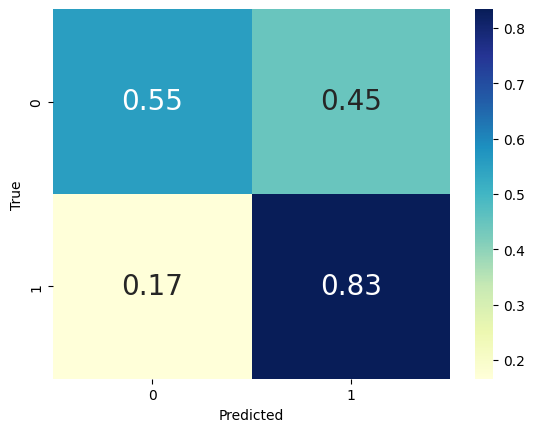

In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_est)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}) \
       .set(ylabel='True', xlabel='Predicted')

### AUC

AUC:  0.7350315397607804


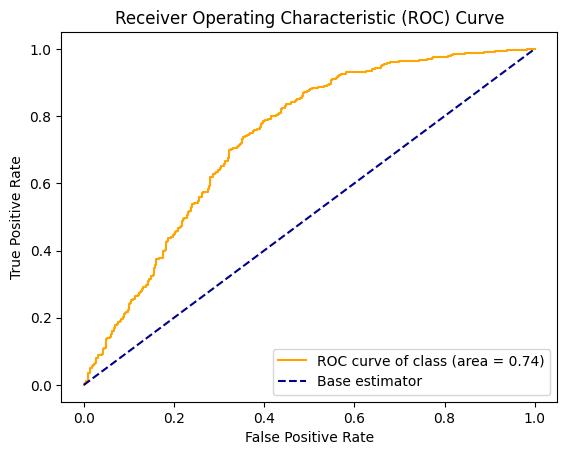

In [ ]:
# Gráfico de área bajo la curva AUC
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, color='orange', label='ROC curve of class (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Base estimator')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, reg_log.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

## KNNeighbors

### Buscando los k vecinos óptimos

For K = 100, train accuracy is 65.47% and test accuracy is 59.53%


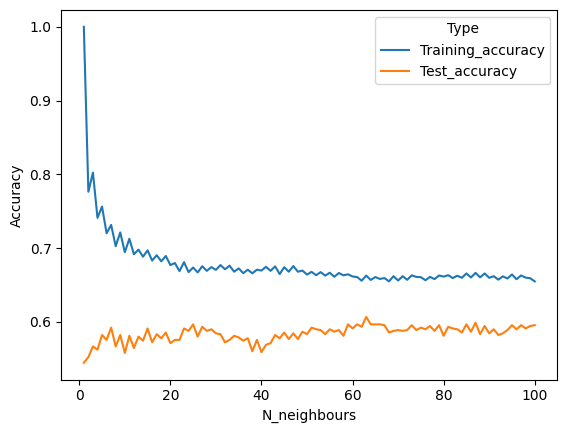

In [ ]:
# Tarda 2min 52s

K_max=100
rang_K = np.arange(1, K_max+1)
accs = pd.DataFrame(columns=["Neighbors","Training Accuracy", "Test Accuracy"])
accs_list = list()

for n_neighbors in rang_K:
    # Crear el modelo y entrenarlo
    knnModel_iter = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    # Obtener la precision para el conjunto de datos de entrenamiento y testeo
    acc_tr = knnModel_iter.score(X_train, y_train)
    acc_test = knnModel_iter.score(X_test, y_test)

    accs_list.append([n_neighbors, acc_tr,acc_test])

accs=pd.DataFrame(accs_list, columns=['N_neighbours','Training_accuracy','Test_accuracy'])

print("For K = %d, train accuracy is %2.2f%% and test accuracy is %2.2f%%"
        % (n_neighbors, 100*acc_tr, 100*acc_test))


# Mostremos la evolución de la precision
melted_accs = accs.melt('N_neighbours', var_name="Type", value_name="Accuracy")
g = sns.lineplot(x="N_neighbours", y="Accuracy", hue='Type', data=melted_accs)

In [ ]:
# # Df donde se almacena la información de todas las iteraciones
# melted_accs

### Entrenamiento de KNeighborsClassifier

In [ ]:
# Tarda 4 min
# KNeighborsClassifier no tiene parámetro random_state así que se usa RandomState de numpy
RandomState(42)

k_max = 70 # Número aproximado obtenido de la comprobación de los k vecimos óptimos anteriormente realizada
k_min = 20 # Número aproximado obtenido de la comprobación de los k vecimos óptimos anteriormente realizada
rang_K = np.arange(20, k_max+1, 5)
tuned_parameters = {
    'n_neighbors': rang_K}
nfold = 5


# Se define el modelo de clasificacion kNN
knnModel_CV = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=nfold, return_train_score=True).fit(X_train, y_train)


In [ ]:
knnModel_CV.best_params_

{'n_neighbors': 65}

### Guardado y carga del modelo

In [ ]:
#---------------------------------- Guardado del modelo -----------------------------
joblib.dump(knnModel_CV, 'models/knnModel_CV_model.pkl')

['models/knnModel_CV_model.pkl']

In [ ]:
#---------------------------------- Carga del modelo -----------------------------
knnModel_CV = joblib.load('models/knnModel_CV_model.pkl')

### Predicción y evaluación

In [ ]:
# Obtener el error cuadratico medio, la precision y la especificidad de test

y_est = knnModel_CV.predict(X_test)

lista_modelos.append('KNNeighbors')
MSE_tst = mean_squared_error(y_est, y_test)
MAE_tst = mean_absolute_error(y_est, y_test)
accuracy = knnModel_CV.score(X_test, y_test)
lista_precisiones.append(accuracy)
tnr = recall_score(y_test, y_est, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
lista_tnr.append(tnr)
recall = recall_score(y_test, y_est)
lista_recall.append(recall)

# Obtener el error cuadratico medio, la precision y la especificidad de train

y_est_train = knnModel_CV.predict(X_train)

MSE_tst_train = mean_squared_error(y_est_train, y_train)
MAE_tst_train = mean_absolute_error(y_est_train, y_train)
accuracy_train = knnModel_CV.score(X_train, y_train)
tnr_train = recall_score(y_train, y_est_train, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
recall_train = recall_score(y_train, y_est_train)


# Se puede obtener el mejor parametro asi
K_CV = knnModel_CV.best_params_['n_neighbors']


# Se muestran los resultados
print('Selected value of k: ' + str(K_CV))
print("----- TRAIN -----")
print('MSE : ' + str(MSE_tst_train))
print('MAE : ' + str(MAE_tst_train))
print('Accuracy: ' + str(accuracy_train))
print('Specificity: ' + str(tnr_train))
print(f"Recall {recall_train}")

print("----- TEST -----")
print('MSE : ' + str(MSE_tst))
print('MAE : ' + str(MAE_tst))
print('Accuracy: ' + str(accuracy))
print('Specificity: ' + str(tnr))
print(f"Recall {recall}")

Selected value of k: 65
----- TRAIN -----
MSE : 0.33940462201331767
MAE : 0.33940462201331767
Accuracy: 0.6605953779866823
Specificity: 0.5700861393891934
Recall 0.7511755485893417
----- TEST -----
MSE : 0.4035476718403548
MAE : 0.4035476718403548
Accuracy: 0.5964523281596452
Specificity: 0.5373134328358209
Recall 0.6605080831408776


### Matriz de confusión

Confusion matrix
[[252 217]
 [147 286]]
Normalized confusion matrix
[[0.53731343 0.46268657]
 [0.33949192 0.66050808]]


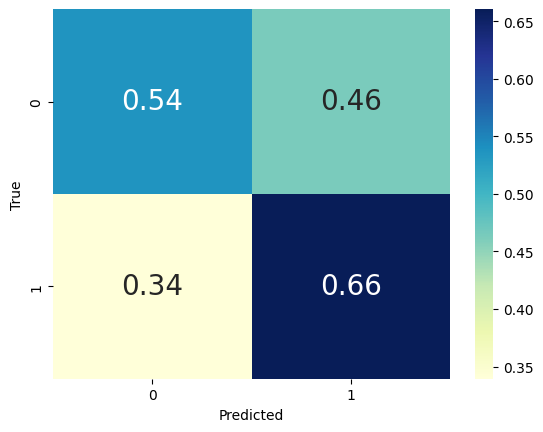

In [ ]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_est)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}) \
       .set(ylabel='True', xlabel='Predicted')

### AUC

AUC:  0.639533280479818


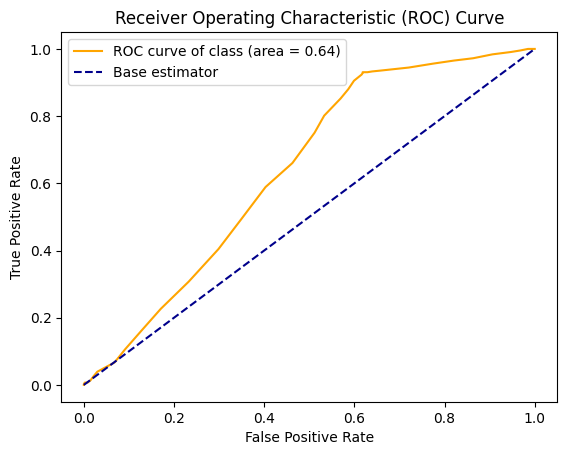

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, knnModel_CV.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

## Support Vector Machine  
Con SGDClassifier  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

### Entrenamiento de Support Vector Machine

In [ ]:
# Tarda 3 min

# Se calcula GridSearchCV para un support vector machine con los parámetros óptimos
# RandomState(42) # se usa random_state de los parámetros de los modelos


epsilon_rang = np.logspace(-3,1,3)
eta0_rang = np.logspace(-3,1,3)
alpha_rang = np.logspace(-3,1,3)

tuned_parameters = [{
    'alpha':alpha_rang,
    'eta0':eta0_rang,
    'epsilon':epsilon_rang,
    'loss':['hinge','squared_hinge'], # Ambos de SVM si se elige una perdida diferente ya no estamos hablando de support vector machine si no de otro tipo de modelos
    'penalty':['l2']
}]

svm_GS = GridSearchCV(SGDClassifier(random_state=42),tuned_parameters, cv=5, error_score='raise').fit(X_train, y_train)


### Guardado y carga del modelo

In [ ]:
#---------------------------------- Guardado del modelo -----------------------------
joblib.dump(svm_GS, 'models/svm_GS_model.pkl')

['models/svm_GS_model.pkl']

In [ ]:
#---------------------------------- Carga del modelo -----------------------------
svm_GS = joblib.load('models/svm_GS_model.pkl')

### Predicción y evaluación

In [ ]:
# Obtener el error cuadratico medio, la precision y la especificidad de test

y_est = svm_GS.predict(X_test)

MSE_tst = mean_squared_error(y_est, y_test)
MAE_tst = mean_absolute_error(y_est, y_test)
accuracy = svm_GS.score(X_test, y_test)
lista_precisiones.append(accuracy)
tnr = recall_score(y_test, y_est, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
lista_tnr.append(tnr)
recall = recall_score(y_test, y_est)
lista_recall.append(recall)

# Obtener el error cuadratico medio, la precision y la especificidad de train

y_est_train = svm_GS.predict(X_train)

lista_modelos.append("Suppor Vector Machine")
MSE_tst_train = mean_squared_error(y_est_train, y_train)
MAE_tst_train = mean_absolute_error(y_est_train, y_train)
accuracy_train = svm_GS.score(X_train, y_train)
tnr_train = recall_score(y_train, y_est_train, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
recall_train = recall_score(y_train, y_est_train)




# Se muestran los resultados

print(f"Parámetros óptimos {svm_GS.best_params_}")
# print(svm_GS.best_estimator_)
print(f"Mejor precisión{svm_GS.best_score_}")


print("----- TRAIN -----")
print('MSE : ' + str(MSE_tst_train))
print('MAE : ' + str(MAE_tst_train))
print('Accuracy: ' + str(accuracy_train))
print('Specificity: ' + str(tnr_train))
print(f"Recall {recall_train}")

print("----- TEST -----")
print('MSE : ' + str(MSE_tst))
print('MAE : ' + str(MAE_tst))
print('Accuracy: ' + str(accuracy))
print('Specificity: ' + str(tnr))
print(f"Recall {recall}")

Parámetros óptimos {'alpha': 0.001, 'epsilon': 0.001, 'eta0': 0.001, 'loss': 'squared_hinge', 'penalty': 'l2'}
Mejor precisión0.7461854863904962
----- TRAIN -----
MSE : 0.24167645906776342
MAE : 0.24167645906776342
Accuracy: 0.7583235409322366
Specificity: 0.7427564604541895
Recall 0.7739028213166145
----- TEST -----
MSE : 0.24944567627494457
MAE : 0.24944567627494457
Accuracy: 0.7505543237250555
Specificity: 0.7761194029850746
Recall 0.7228637413394919


### Matriz de confusión

Confusion matrix
[[364 105]
 [120 313]]
Normalized confusion matrix
[[0.7761194  0.2238806 ]
 [0.27713626 0.72286374]]


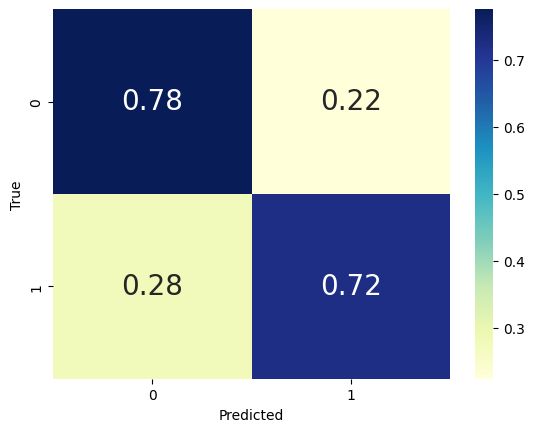

In [ ]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_est)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}) \
       .set(ylabel='True', xlabel='Predicted')

### AUC

AUC:  0.7494915721622832


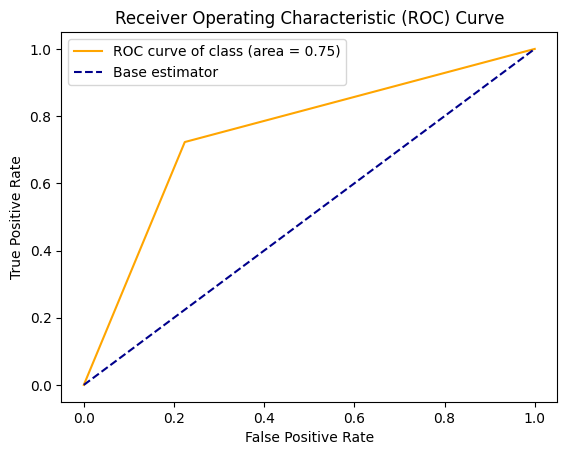

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, svm_GS.predict(X_test))
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

AttributeError: probability estimates are not available for loss='hinge'

## Árbol de decisión

In [ ]:
# Qué parámetros probar en min_samples_leaf y min_samples_split, fuente https://stackoverflow.com/questions/67532613/how-to-define-min-sample-split-and-min-sample-leaf-in-decision-tree-regresso

### Entrenamiendo de árbol de decisión

In [ ]:
# Búsqueda de los mejores parámetros
# Tarda 5 min
# RandomState(0) # En su lugar se usa random_state en los parámetros del modelo

# max_depth cuanto menor sea, menos sobreaprende el árbol de decisión
# np.logspace(-3,-1,4)
# np.linspace(0.01, 0.03, 4)
rang_split = np.logspace(-3,-2,4)
rang_samples = np.logspace(-3,-1,4)
rang_depth = np.arange(3,7)
tuned_parameters=[{'criterion':['gini','entropy','log_loss'],
                    'max_depth':rang_depth,
                    'min_samples_leaf':rang_samples,
                    'min_samples_split':rang_split
                    }]
nfolds=5

tree_CV = GridSearchCV(DecisionTreeClassifier(random_state=42), tuned_parameters, cv=nfolds,error_score='raise').fit(X_train, y_train)
# No se usa return_train_score=False por motivos de optimización del tiempo de ejecución


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
tree_CV.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 0.021544346900318832,
 'min_samples_split': 0.001}

### Guardado y carga del modelo

In [ ]:
#---------------------------------- Guardado del modelo -----------------------------
joblib.dump(tree_CV, 'models/tree_CV_model.pkl')

['models/tree_CV_model.pkl']

In [ ]:
#---------------------------------- Carga del modelo -----------------------------
tree_CV = joblib.load('models/tree_CV_model.pkl')

### Predicción y evaluación

In [ ]:
# Obtener el error cuadratico medio, la precision y la especificidad de test

y_est = tree_CV.predict(X_test)

MSE_tst = mean_squared_error(y_est, y_test)
MAE_tst = mean_absolute_error(y_est, y_test)
accuracy = tree_CV.score(X_test, y_test)
lista_precisiones.append(accuracy)
tnr = recall_score(y_test, y_est, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
lista_tnr.append(tnr)
recall = recall_score(y_test, y_est)
lista_recall.append(recall)

# Obtener el error cuadratico medio, la precision y la especificidad de train

y_est_train = tree_CV.predict(X_train)

lista_modelos.append("Árbol de decisión")
MSE_tst_train = mean_squared_error(y_est_train, y_train)
MAE_tst_train = mean_absolute_error(y_est_train, y_train)
accuracy_train = tree_CV.score(X_train, y_train)
tnr_train = recall_score(y_train, y_est_train, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
recall_train = recall_score(y_train, y_est_train)




# Se muestran los resultados

print(f"Parámetros óptimos {tree_CV.best_params_}")
# print(svm_GS.best_estimator_)
print(f"Mejor precisión{tree_CV.best_score_}")


print("----- TRAIN -----")
print('MSE : ' + str(MSE_tst_train))
print('MAE : ' + str(MAE_tst_train))
print('Accuracy: ' + str(accuracy_train))
print('Specificity: ' + str(tnr_train))
print(f"Recall {recall_train}")

print("----- TEST -----")
print('MSE : ' + str(MSE_tst))
print('MAE : ' + str(MAE_tst))
print('Accuracy: ' + str(accuracy))
print('Specificity: ' + str(tnr))
print(f"Recall {recall}")

Parámetros óptimos {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 0.021544346900318832, 'min_samples_split': 0.001}
Mejor precisión0.7622447199802197
----- TRAIN -----
MSE : 0.21269095182138661
MAE : 0.21269095182138661
Accuracy: 0.7873090481786134
Specificity: 0.7325763508222396
Recall 0.8420846394984326
----- TEST -----
MSE : 0.2682926829268293
MAE : 0.2682926829268293
Accuracy: 0.7317073170731707
Specificity: 0.6993603411513859
Recall 0.766743648960739


In [ ]:
# tree_CV.cv_results_['params']

In [ ]:
# print(tree_CV.cv_results_.keys())

### Matriz de confusión

Confusion matrix
[[328 141]
 [101 332]]
Normalized confusion matrix
[[0.69936034 0.30063966]
 [0.23325635 0.76674365]]


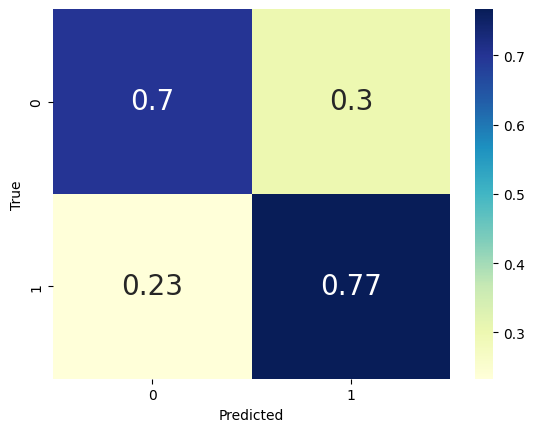

In [ ]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_est)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}) \
       .set(ylabel='True', xlabel='Predicted')

### AUC

AUC:  0.8139843507635034


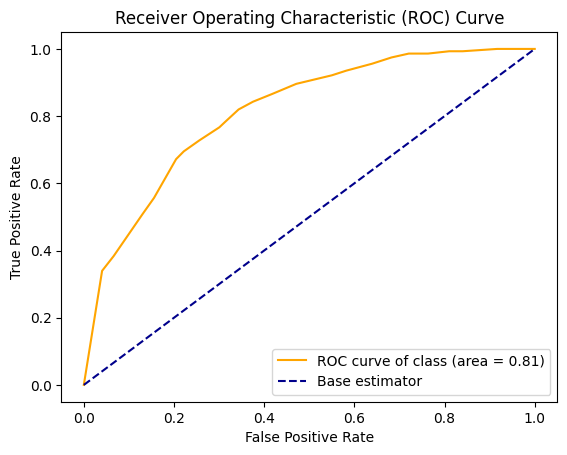

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,tree_CV.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

In [ ]:
# # Para ver la variable que tiene más importancia en el modelo
# # Este código funciona cuando los datos de entrada estan en formato DataFrame

# indice = pd.DataFrame(tree.feature_importances_).idxmax()
# X_train.columns[indice]

### Plot_tree

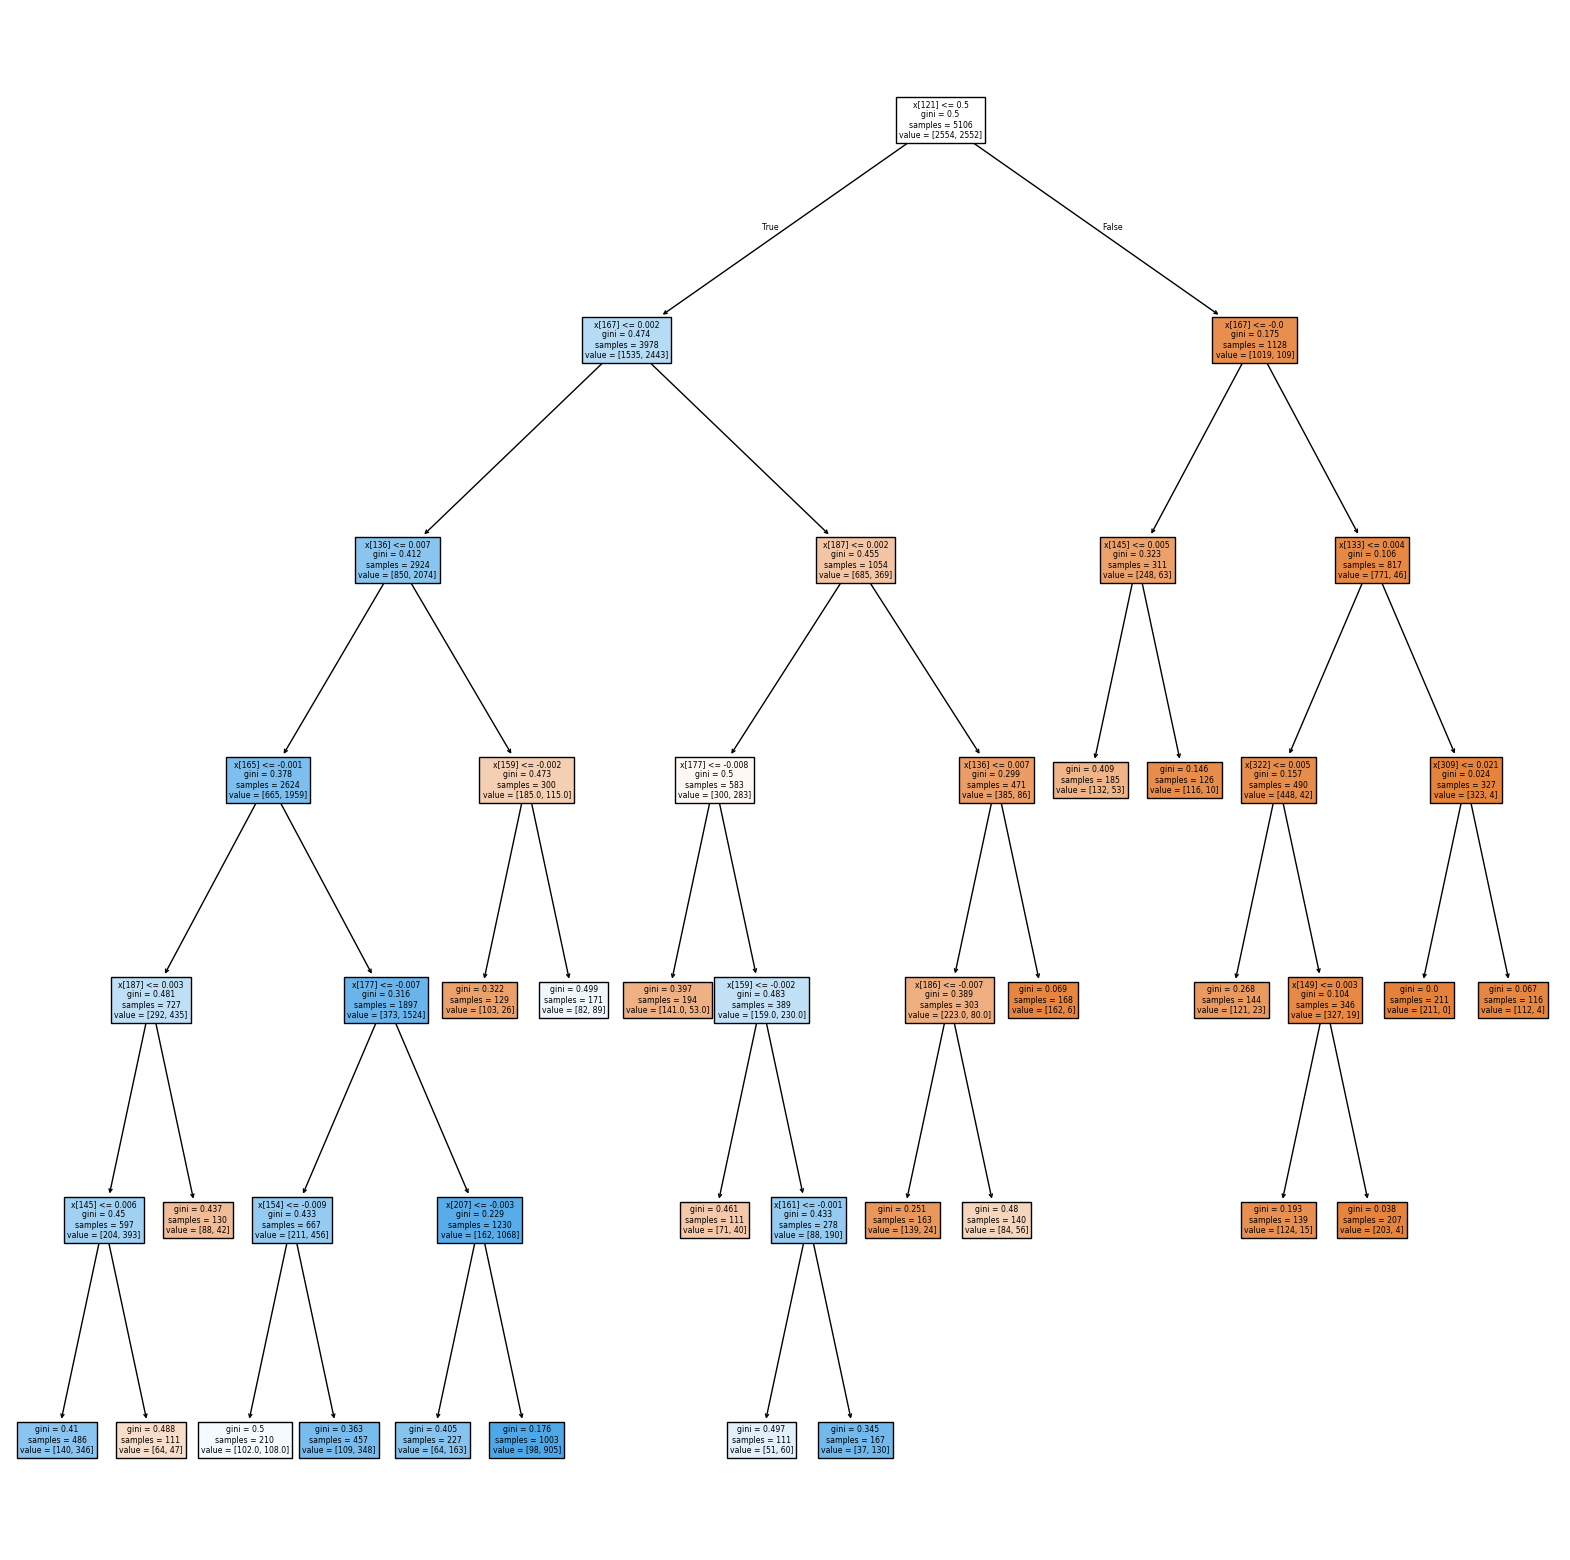

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
plot_tree(tree_CV.best_estimator_, filled=True) # , feature_names=X_train.columns
plt.show()

In [ ]:
# NO SE PUEDE METER EN EL ESTIMATOR DE UN BAGGING UN MODELO YA ENTRENADO, ESTE CÓDIGO ESTA MAL
# Ensamble con 30 árboles de decisión
# bagging_tree = BaggingClassifier(grid_tree, n_estimators = 30, max_samples=.5, max_features=.5, oob_score=True).fit(X_train , y_train)

# y_est = bagging_tree.predict(X_test)

# print("Accuracy",bagging_tree.score(X_test, y_test))
# print("MSE",mean_squared_error(y_est, y_test))
# bagging_tree.estimators_[0].best_estimator_

# Algoritmos avanzados: Emsemblers

## Bagging con tocones

In [ ]:
# Se busca el número de estimadores óptimo
# Tarda 2 min
tuned_parameters =[{
    'n_estimators':np.arange(1,21)
}]

grid_bagg = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42)), tuned_parameters, cv=5).fit(X_train, y_train)

grid_bagg.best_params_

{'n_estimators': 1}

In [ ]:
tocones = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), n_estimators=10, max_features=.5, max_samples=.5).fit(X_train, y_train)


y_est = tocones.predict(X_test)

lista_modelos.append("Bagging de tocones")
tnr = recall_score(y_test, y_est, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
recall = recall_score(y_test, y_est)
lista_tnr.append(tnr)
lista_recall.append(recall)
lista_precisiones.append(tocones.score(X_test, y_test))

print(f"Precision {tocones.score(X_test, y_test)}")
print(F"MSE {mean_squared_error(y_test, y_est)}")
print(f"True Negative Rate {tnr}")
print(f"Recall {recall}")


Precision 0.7228381374722838
MSE 0.2771618625277162
True Negative Rate 0.6609808102345416
Recall 0.789838337182448


### Guardado y carga del modelo

In [ ]:
#---------------------------------- Guardado del modelo -----------------------------
joblib.dump(grid_bagg, 'models/tocones_model.pkl')

['models/tocones_model.pkl']

In [ ]:
#---------------------------------- Carga del modelo -----------------------------
grid_bagg = joblib.load('models/tocones_model.pkl')

### Matriz de confusión

Confusion matrix
[[310 159]
 [ 91 342]]
Normalized confusion matrix
[[0.66098081 0.33901919]
 [0.21016166 0.78983834]]


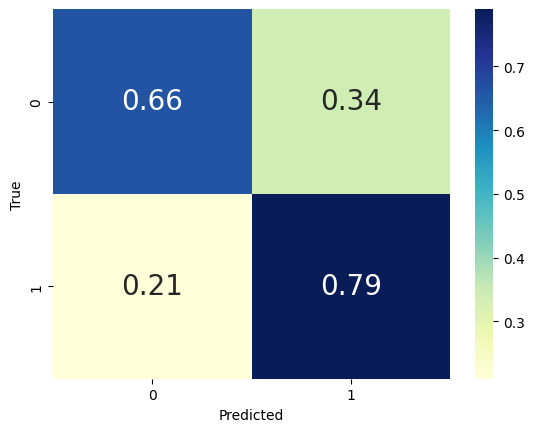

In [ ]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_est)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis] # Aqui esta calculando el recall TPR y la especificidad TNR
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}) \
       .set(ylabel='True', xlabel='Predicted')

### AUC

AUC:  0.8139843507635034


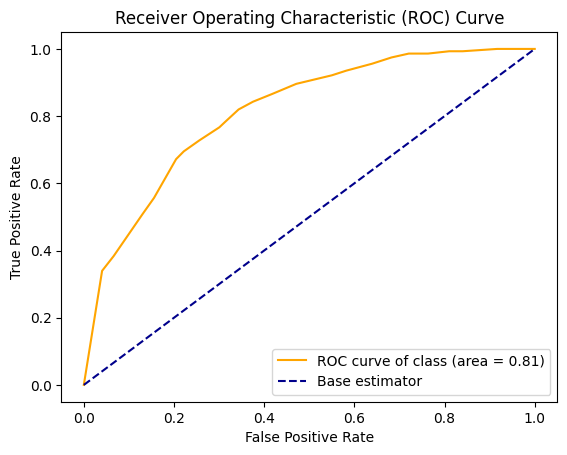

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,grid_bagg.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

## Random Forest

In [ ]:
# Cantidad de variables que se escogen en los nodos
print(X_train.shape[1])

variables = int((X_train.shape[1])**(0.5))
print(variables)

330
18


https://stackoverflow.com/questions/44683253/bagging-with-decision-stumps-in-sklearn-how-to-view-the-results

### Entrenamiento de RandomForestClassifier

In [ ]:
print(np.logspace(-3,-2,3))

print(np.linspace(0.01, 0.03, 3))

[0.001      0.00316228 0.01      ]
[0.01 0.02 0.03]


[Enlace de referencia de parámetros óptimos para random forest](https://datascience.stackexchange.com/questions/111833/how-and-what-parameter-to-choose-for-a-random-forest-classifier)  
RandomForest no son propensos a sobre aprender a diferencia de los árboles de decisión, por eso no se especifica la profundidad máxima.

In [ ]:
# RandomState(42)
# Tarda 11 min sin especificar min_samples_leaf y min_samples_split
# Tarda x con min_samples_leaf y min_samples_split

rang_split = np.logspace(-3,-2,4)
# rang_samples = np.linspace(0.01, 0.03, 4)
# depth = np.arange(4,8)
# n_estimators = np.arange(1,21)
features=['sqrt','log2']
criterion=['gini','entropy','log_loss']

tuned_parameters=[{
    # 'n_estimators': [100,150,200],
    # 'max_depth':depth,
    'max_features':features,
    'criterion':criterion,
    # 'min_samples_leaf':rang_samples,
    'min_samples_split':rang_split
}]

# tuned_parameters=[{
#     'n_estimators': [100,150,200],
#     'max_features': ['sqrt','log2'],
#     'max_depth' : [4,5,6,7],
#     'min_samples_split' :[2,3,4,5,6],
#     'max_samples': [100,150,200,250]
# }]



r_forest = GridSearchCV(RandomForestClassifier(random_state=42), tuned_parameters, error_score='raise').fit(X_train, y_train)


In [ ]:
r_forest.best_params_

{'criterion': 'entropy',
 'max_features': 'sqrt',
 'min_samples_split': 0.0021544346900318843}

### Guardado y carga del modelo

In [ ]:
#---------------------------------- Guardado del modelo -----------------------------
joblib.dump(r_forest, 'models/r_forest_model.pkl')

['models/r_forest_model.pkl']

In [ ]:
#---------------------------------- Carga del modelo -----------------------------
r_forest = joblib.load('models/r_forest_model.pkl')

### Predicción y evaluación

In [ ]:
# Obtener el error cuadratico medio, la precision y la especificidad de test

y_est = r_forest.predict(X_test)

lista_modelos.append("RandomForest")
MSE_tst = mean_squared_error(y_est, y_test)
MAE_tst = mean_absolute_error(y_est, y_test)
accuracy = r_forest.score(X_test, y_test)
lista_precisiones.append(accuracy)
tnr = recall_score(y_test, y_est, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
lista_tnr.append(tnr)
recall = recall_score(y_test, y_est)
lista_recall.append(recall)

# Obtener el error cuadratico medio, la precision y la especificidad de train

y_est_train = r_forest.predict(X_train)

MSE_tst_train = mean_squared_error(y_est_train, y_train)
MAE_tst_train = mean_absolute_error(y_est_train, y_train)
accuracy_train = r_forest.score(X_train, y_train)
tnr_train = recall_score(y_train, y_est_train, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
recall_train = recall_score(y_train, y_est_train)




# Se muestran los resultados

print(f"Parámetros óptimos {r_forest.best_params_}")
# print(svm_GS.best_estimator_)
print(f"Mejor precisión {r_forest.best_score_}")


print("----- TRAIN -----")
print('MSE : ' + str(MSE_tst_train))
print('MAE : ' + str(MAE_tst_train))
print('Accuracy: ' + str(accuracy_train))
print('Specificity: ' + str(tnr_train))
print(f"Recall {recall_train}")

print("----- TEST -----")
print('MSE : ' + str(MSE_tst))
print('MAE : ' + str(MAE_tst))
print('Accuracy: ' + str(accuracy))
print('Specificity: ' + str(tnr))
print(f"Recall {recall}")

Parámetros óptimos {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 0.0021544346900318843}
Mejor precisión 0.8180594980938451
----- TRAIN -----
MSE : 0.0023501762632197414
MAE : 0.0023501762632197414
Accuracy: 0.9976498237367802
Specificity: 0.9984338292873923
Recall 0.9968652037617555
----- TEST -----
MSE : 0.19290465631929046
MAE : 0.19290465631929046
Accuracy: 0.8070953436807096
Specificity: 0.837953091684435
Recall 0.7736720554272517


### Matriz de confusión

Confusion matrix
[[393  76]
 [ 98 335]]
Normalized confusion matrix
[[0.83795309 0.16204691]
 [0.22632794 0.77367206]]


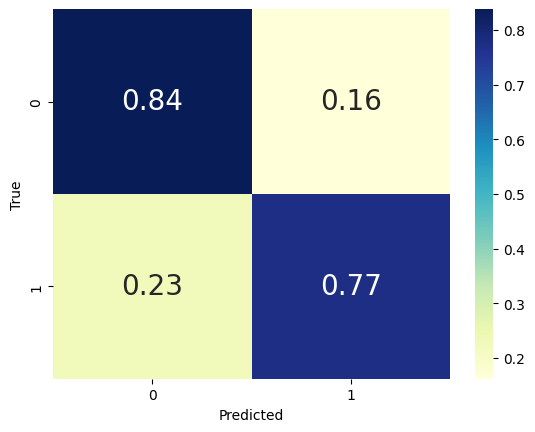

In [ ]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_est)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis] # Aqui esta calculando el recall TPR y la especificidad TNR
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}) \
       .set(ylabel='True', xlabel='Predicted')

0.7  - 0.3  
0.19 - 0.81

Ejecución anterior  
Confusion matrix  
[[310 134]  
 [114 393]]  
Normalized confusion matrix  
[[0.6981982  0.3018018 ]  
 [0.22485207 0.77514793]]  

### AUC

AUC:  0.8930011768934936


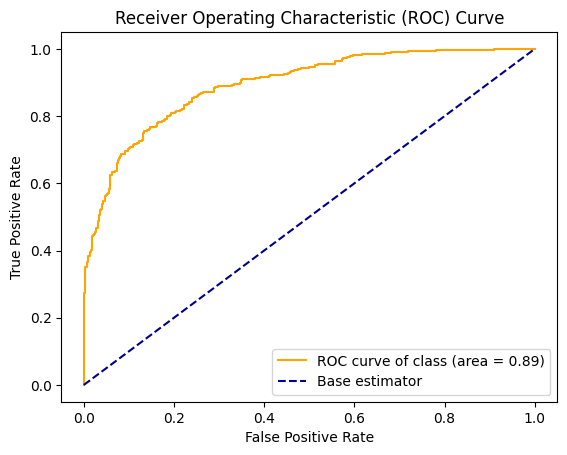

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,r_forest.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

In [ ]:
# dtype = pd.CategoricalDtype(['False Positive','True prediction','False Negative'])
# test_data = X_test[["visitas", "compartir"]].assign(Prediction=pd.Categorical.from_codes(codes=(y_test.values-y_est+1).astype(int), dtype=dtype))

# plt.figure(figsize=(9,6))
# g = sns.scatterplot(x="visitas", y="compartir", hue='Prediction', palette='mako', data=test_data, s=100)

In [ ]:
# help(plot_tree)

## Bagging con DecisionTreeClassifer

### Entrenamiento de Bagging de árboles de decisión

In [ ]:
# Entrenar y evaluar

# n_estimators = np.arange(1,21)
n_estimators = [100, 150, 200]


tuned_parameters=[{
    'n_estimators': n_estimators,

}]
bagging_tree = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(random_state=42, max_depth=6), max_features=0.5, max_samples=0.5), tuned_parameters).fit(X_train , y_train)


In [ ]:
bagging_tree.best_params_

{'n_estimators': 150}

Se usa max_depth = 5 . Cuanto mayor sea la profundidad del arbol más sobre aprende el modelo.  
Limitar la profundidad se le llama poda, es una técnica para evitar que el modelo no generalice bien, es decir, que sobre aprenda.

### Guardado y carga del modelo

In [ ]:
#---------------------------------- Guardado del modelo -----------------------------
joblib.dump(bagging_tree, 'models/bagging_tree_model.pkl')

['models/bagging_tree_model.pkl']

In [ ]:
#---------------------------------- Carga del modelo -----------------------------
bagging_tree = joblib.load('models/bagging_tree_model.pkl')

### Predicción y evaluación

In [ ]:
# Obtener el error cuadratico medio, la precision y la especificidad de test

y_est = bagging_tree.predict(X_test)

lista_modelos.append("Bagging de árboles")
MSE_tst = mean_squared_error(y_est, y_test)
MAE_tst = mean_absolute_error(y_est, y_test)
accuracy = bagging_tree.score(X_test, y_test)
lista_precisiones.append(accuracy)
tnr = recall_score(y_test, y_est, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
lista_tnr.append(tnr)
recall = recall_score(y_test, y_est)
lista_recall.append(recall)

# Obtener el error cuadratico medio, la precision y la especificidad de train

y_est_train = bagging_tree.predict(X_train)

MSE_tst_train = mean_squared_error(y_est_train, y_train)
MAE_tst_train = mean_absolute_error(y_est_train, y_train)
accuracy_train = bagging_tree.score(X_train, y_train)
tnr_train = recall_score(y_train, y_est_train, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
recall_train = recall_score(y_train, y_est_train)




# Se muestran los resultados

print(f"Parámetros óptimos {bagging_tree.best_params_}")
# print(svm_GS.best_estimator_)
print(f"Mejor precisión {bagging_tree.best_score_}")


print("----- TRAIN -----")
print('MSE : ' + str(MSE_tst_train))
print('MAE : ' + str(MAE_tst_train))
print('Accuracy: ' + str(accuracy_train))
print('Specificity: ' + str(tnr_train))
print(f"Recall {recall_train}")

print("----- TEST -----")
print('MSE : ' + str(MSE_tst))
print('MAE : ' + str(MAE_tst))
print('Accuracy: ' + str(accuracy))
print('Specificity: ' + str(tnr))
print(f"Recall {recall}")

Parámetros óptimos {'n_estimators': 150}
Mejor precisión 0.8094452888557513
----- TRAIN -----
MSE : 0.12867215041128086
MAE : 0.12867215041128086
Accuracy: 0.8713278495887191
Specificity: 0.8210649960845732
Recall 0.9216300940438872
----- TEST -----
MSE : 0.2039911308203991
MAE : 0.2039911308203991
Accuracy: 0.7960088691796009
Specificity: 0.7825159914712153
Recall 0.8106235565819861


In [ ]:
# dtype = pd.CategoricalDtype(['False Positive','True prediction','False Negative'])
# test_data = X_test[["visitas", "compartir"]].assign(Prediction=pd.Categorical.from_codes(codes=(y_test.values-y_est+1).astype(int), dtype=dtype))

# plt.figure(figsize=(9,6))
# g = sns.scatterplot(x="visitas", y="compartir", hue='Prediction', palette='mako', data=test_data, s=100)

### Matriz de confusión

In [ ]:
# test_data

Confusion matrix
[[367 102]
 [ 82 351]]
Normalized confusion matrix
[[0.78251599 0.21748401]
 [0.18937644 0.81062356]]


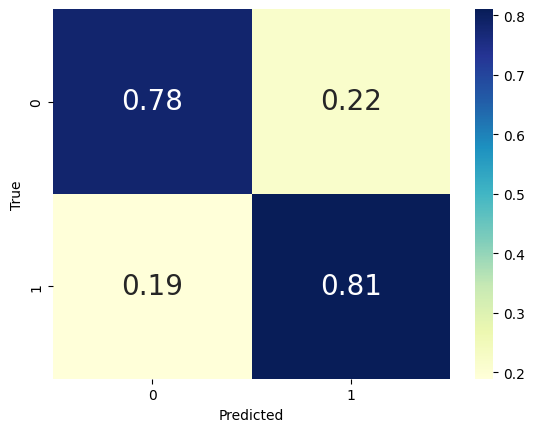

In [ ]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_est)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis] # Aqui esta calculando el recall TPR y la especificidad TNR
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}) \
       .set(ylabel='True', xlabel='Predicted')

### AUC

AUC:  0.8851519374424479


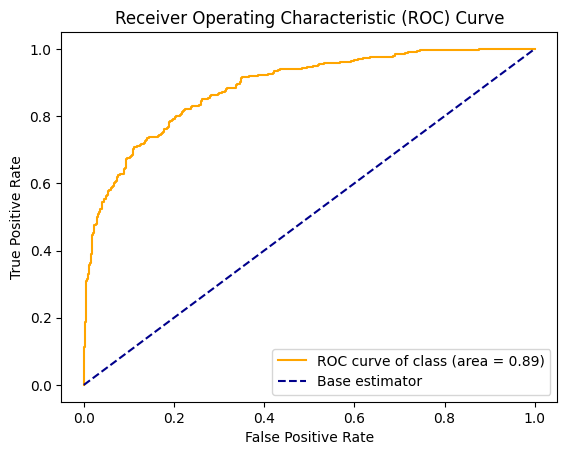

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,bagging_tree.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

In [ ]:
# n_nodes = bagging_tree.estimators_[1].tree_.node_count
# children_left = bagging_tree.estimators_[1].tree_.children_left
# children_right = bagging_tree.estimators_[1].tree_.children_right
# feature = bagging_tree.estimators_[1].tree_.feature
# threshold = bagging_tree.estimators_[1].tree_.threshold
# values = bagging_tree.estimators_[1].tree_.value

# # print(n_nodes, children_left, children_right, feature, threshold, values, sep='\n\n')
# node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
# is_leaves = np.zeros(shape=n_nodes, dtype=bool)
# stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
# while len(stack) > 0:
#     # `pop` ensures each node is only visited once
#     node_id, depth = stack.pop()
#     node_depth[node_id] = depth

#     # If the left and right child of a node is not the same we have a split
#     # node
#     is_split_node = children_left[node_id] != children_right[node_id]
#     # If a split node, append left and right children and depth to `stack`
#     # so we can loop through them
#     if is_split_node:
#         stack.append((children_left[node_id], depth + 1))
#         stack.append((children_right[node_id], depth + 1))
#     else:
#         is_leaves[node_id] = True

# print(
#     "The binary tree structure has {n} nodes and has "
#     "the following tree structure:\n".format(n=n_nodes)
# )
# for i in range(n_nodes):
#     if is_leaves[i]:
#         print(
#             "{space}node={node} is a leaf node with value={value}.".format(
#                 space=node_depth[i] * "\t", node=i, value=values[i]
#             )
#         )
#     else:
#         print(
#             "{space}node={node} is a split node with value={value}: "
#             "go to node {left} if X[:, {feature}] <= {threshold} "
#             "else to node {right}.".format(
#                 space=node_depth[i] * "\t",
#                 node=i,
#                 left=children_left[i],
#                 feature=feature[i],
#                 threshold=threshold[i],
#                 right=children_right[i],
#                 value=values[i],
#             )
#         )

In [ ]:
# from sklearn import tree

# for col in range(len(bagging_tree.estimators_)):
#     fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize=(20,20)) # estimators_[0]
#     tree.plot_tree(bagging_tree.estimators_[col],
#                     feature_names = X_train.columns,
#                     filled=True)
#     plt.show()

## Emsembler secuenciales

In [ ]:
from xgboost import XGBClassifier

bst = XGBClassifier(max_depth=1, n_estimators=100, objective = 'multi:softmax')
bst.fit(X_train, y_train)
preds = bst.predict(X_test)
acc_XGB = bst.score(X_test,y_test)

print('Accuracy of XGBoost ensemble is %2.2f '%(100*acc_XGB))

XGBoostError: value 0 for Parameter num_class should be greater equal to 1
num_class: Number of output class in the multi-class classification.

In [ ]:
from lightgbm import LGBMClassifier

bst = LGBMClassifier(max_depth=1, n_estimators=100, objective = 'multiclass')
bst.fit(X_train, y_train)
# make prediction
preds = bst.predict(X_test)
acc_LGB = bst.score(X_test,y_test)


print('Accuracy of LightGBM ensemble is %2.2f '%(100*acc_LGB))

# Corte de ejecución

In [ ]:
raise Exception("Parar aqui")

# Redes neuronales

## Clasificación con RNN solo con textos
Red neuronal recurrente

[Información sacada de la documentación](https://www.tensorflow.org/tutorials/keras/text_classification?hl=es-419#train_the_model)

https://www.tensorflow.org/text/tutorials/text_classification_rnn?hl=es-419#train_the_model

In [25]:
RandomState(42)

RandomState(MT19937) at 0x781A9CBB7A40

### Entrenamiento

In [49]:
embedding_dim = 100 # tambien se puede usar 150,200,300

In [52]:
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        max_features_textos,
        embedding_dim,
        # input_length=sequence_length_textos,
        # Use masking to handle the variable sequence lengths
        # mask_zero=True
        ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,  return_sequences=True, kernel_regularizer=keras.regularizers.l2(0.001))),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, kernel_regularizer=keras.regularizers.l2(0.001))),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation="sigmoid")
])


model.compile(loss=tf.keras.losses.BinaryCrossentropy(), #from_logits=True
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['accuracy','TrueNegatives', 'FalsePositives','AUC'])

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True), # Permite parar la ejecución antes del máximo de epochs monitorizando la perdida del conjunto de validación y parando la ejecución cuando deje de disminuir a lo largo de 5 epochs.
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=8, min_lr=1e-6), # Cuando la pérdida del conjunto de validación deje de disminuir a lo largo de  epochs, reduce un 0.1 por ciento el learning rate llegando a un 1e-6 de mínimo.
    tf.keras.callbacks.ModelCheckpoint(filepath='models/checkpoint_rnn_model.keras',
    monitor='val_loss', save_best_only=True, verbose=1) # Guarda el epoch con mejores valores durante el entrenamiento
]

history = model.fit(X_train_texto, y_train, epochs=30,
                    validation_data=(X_test_texto, y_test),
                    callbacks=callbacks)

Epoch 1/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - AUC: 0.6037 - FalsePositives: 518.1937 - TrueNegatives: 779.3688 - accuracy: 0.5786 - loss: 1.7819
Epoch 1: val_loss improved from inf to 1.24759, saving model to models/checkpoint_rnn_model.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 24s 112ms/step - AUC: 0.6038 - FalsePositives: 521.3541 - TrueNegatives: 784.0125 - accuracy: 0.5786 - loss: 1.7809 - val_AUC: 0.7060 - val_FalsePositives: 460.0000 - val_TrueNegatives: 9.0000 - val_accuracy: 0.4889 - val_loss: 1.2476 - learning_rate: 0.0010
Epoch 2/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - AUC: 0.6207 - FalsePositives: 526.6188 - TrueNegatives: 770.9437 - accuracy: 0.5780 - loss: 1.2351
Epoch 2: val_loss improved from 1.24759 to 1.02485, saving model to models/checkpoint_rnn_model.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step - AUC: 0.6208 - FalsePositives: 529.7826 - TrueNegatives: 775.5839 - accuracy: 0.5781 - loss: 1.2346 - val_AUC: 0.7114 - val_FalsePositives: 360.0000 - val_True

### Guardado y carga del modelo

In [ ]:
# # ------------- Guardado checkpoint
# model = tf.keras.models.load_model(
#     'models/checkpoint_encoder_model.keras')

In [ ]:
# # ----------- Carga checkpoint
# model = tf.keras.models.load_model("models/rnn_textos_model.keras")

In [61]:
# --------------- Guardar modelo ----------------
model.save('rnn_textos_model.keras')
# keras.saving.save_model(model, "models/rnn_textos_model.keras.zip")

In [62]:
# --------------- Cargar modelo ----------------
model = tf.keras.models.load_model("models/rnn_textos_model.keras")

In [63]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), #from_logits=True
              optimizer=tf.keras.optimizers.Adam(0.00001),
              metrics=['accuracy','TrueNegatives', 'FalsePositives','AUC'])

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True), # Permite parar la ejecución antes del máximo de epochs monitorizando la perdida del conjunto de validación y parando la ejecución cuando deje de disminuir a lo largo de 5 epochs.
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, min_lr=1e-9), # Cuando la pérdida del conjunto de validación deje de disminuir a lo largo de  epochs, reduce un 0.1 por ciento el learning rate llegando a un 1e-6 de mínimo.
    tf.keras.callbacks.ModelCheckpoint(filepath='models/checkpoint_rnn_model.keras',
    monitor='val_loss', save_best_only=True, verbose=1) # Guarda el epoch con mejores valores durante el entrenamiento
]

history = model.fit(X_train_texto, y_train, epochs=50,
                    validation_data=(X_test_texto, y_test),
                    callbacks=callbacks)

Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - AUC: 0.7763 - FalsePositives: 400.2687 - TrueNegatives: 897.2938 - accuracy: 0.7079 - loss: 0.5863
Epoch 1: val_loss improved from inf to 0.60328, saving model to models/checkpoint_rnn_model.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - AUC: 0.7763 - FalsePositives: 402.7578 - TrueNegatives: 902.6087 - accuracy: 0.7079 - loss: 0.5863 - val_AUC: 0.7577 - val_FalsePositives: 146.0000 - val_TrueNegatives: 323.0000 - val_accuracy: 0.6863 - val_loss: 0.6033 - learning_rate: 1.0000e-05
Epoch 2/50
159/160 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - AUC: 0.7770 - FalsePositives: 387.7421 - TrueNegatives: 901.9182 - accuracy: 0.7133 - loss: 0.5859
Epoch 2: val_loss did not improve from 0.60328
160/160 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - AUC: 0.7770 - FalsePositives: 392.6149 - TrueNegatives: 912.7515 - accuracy: 0.7132 - loss: 0.5860 - val_AUC: 0.7573 - val_FalsePositives: 147.0000 - val_TrueNegatives: 322.0000 - val_accuracy: 0.6863 - val_los

In [ ]:
model = tf.keras.models.load_model("models/checkpoint_rnn_model.keras")

### Predicción y evaluación

In [64]:
accuracy_train = model.evaluate(X_train_texto, y_train)
accuracy = model.evaluate(X_test_texto, y_test)
# lista_modelos.append("Red neuronal recurrente solo textos")
# lista_precisiones.append(accuracy[1])

print(accuracy_train[1], accuracy[1])

160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - AUC: 0.7898 - FalsePositives: 320.8261 - TrueNegatives: 969.7018 - accuracy: 0.7162 - loss: 0.5720
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - AUC: 0.7593 - FalsePositives: 72.9667 - TrueNegatives: 182.8667 - accuracy: 0.6972 - loss: 0.5988
0.7136701941490173 0.6884700655937195


In [ ]:
y_est = np.round(model.predict(X_test_texto))
y_est_train = np.round(model.predict(X_train_texto))

29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 741ms/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 112s 704ms/step


In [ ]:
# TNR = history.history['true_negatives'][0] / (history.history['false_positives'][0] + history.history['false_positives'][0]) esto no funciona

from sklearn.metrics import recall_score

TNR = recall_score(y_test, y_est, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
TNR_train = recall_score(y_train, y_est_train, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
lista_tnr.append(TNR)

recall = recall_score(y_test, y_est)
lista_recall.append(recall)
recall_train = recall_score(y_train, y_est_train)

print("TEST",TNR)
print("TRAIN",TNR_train)
print("-----------")



TEST 0.7100213219616205
TRAIN 0.7447141738449491
-----------


### Matriz confusión

Confusion matrix
[[333 136]
 [150 283]]
Normalized confusion matrix
[[0.71002132 0.28997868]
 [0.34642032 0.65357968]]


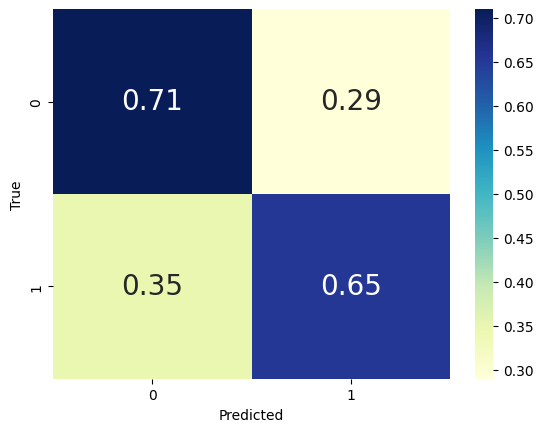

In [ ]:
import seaborn as sns

# Matriz de confusión
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_est)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}) \
       .set(ylabel='True', xlabel='Predicted')

### AUC

29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 809ms/step
AUC:  0.7506069126488967


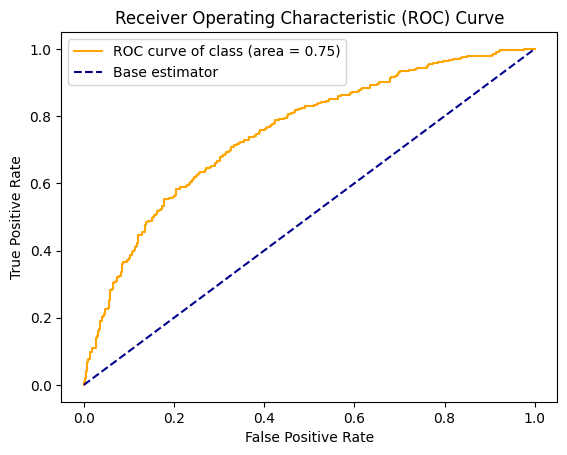

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test_texto))
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

## Clasificación con RNN de textos y métricas

https://www.tensorflow.org/text/tutorials/text_classification_rnn?hl=es-419#train_the_model

### Entrenamiento
Sin usar Sequential

In [ ]:
embedding_dim = 100

# Capas de entrada
input_vectorized = tf.keras.layers.Input(shape=(sequence_length_textos,)) # Entrada para el embedding
input_additional = tf.keras.layers.Input(shape=(X_train_metricas.shape[1],)) # Esta es la entrada de las métricas

# Embedding y LSTM
embedding = tf.keras.layers.Embedding(
    max_features_textos,
    embedding_dim,
    # mask_zero=True # Se usa mask_zero=True para manejar las secuencias de longitud variables. Para ignorar los ceros de padding en la pérdida
)(input_vectorized)
input_normalized = tf.keras.layers.BatchNormalization()(embedding)

dropout_1 =  tf.keras.layers.Dropout(0.5)(input_normalized)
lstm_nuevo = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,  return_sequences=True))(dropout_1) # PARTE NUEVA
lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(lstm_nuevo)

# Capa dense con las métricas.
dense_additional = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))(input_additional)
dense_additional_norm1 = tf.keras.layers.BatchNormalization()(dense_additional)

# Se concatenan las salidas
concatenated = tf.keras.layers.Concatenate()([lstm, dense_additional_norm1])
batch_norm1 = tf.keras.layers.BatchNormalization()(concatenated)

dropout_2 =  tf.keras.layers.Dropout(0.5)(batch_norm1)
dense = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))(dropout_2)
batch_norm2 = tf.keras.layers.BatchNormalization()(dense)
dropout_3 =  tf.keras.layers.Dropout(0.5)(batch_norm2)
output = tf.keras.layers.Dense(1, activation='sigmoid')(dropout_3)


model = tf.keras.Model(inputs=[input_vectorized, input_additional], outputs=output)


model.compile(loss=tf.keras.losses.BinaryCrossentropy(),  #BinaryFocalCrossentropy()
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['accuracy','TrueNegatives', 'FalsePositives', 'AUC'])


callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True), # Permite parar la ejecución antes del máximo de epochs monitorizando la perdida del conjunto de validación y parando la ejecución cuando deje de disminuir a lo largo de 5 epochs.
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=8, min_lr=1e-7), # Cuando la pérdida del conjunto de validación deje de disminuir a lo largo de  epochs, reduce un 0.1 por ciento el learning rate llegando a un 1e-6 de mínimo.
    tf.keras.callbacks.ModelCheckpoint(filepath='models/checkpoint_encoder_model.keras',
    monitor='val_loss', save_best_only=True, verbose=1) # Guarda el epoch con mejores valores durante el entrenamiento. No se puede usar, hay que serializar cada capa customizada
]

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)


history = model.fit(
    [X_train_texto, X_train_metricas],
    y_train,
    epochs=50,
    validation_data=([X_test_texto, X_test_metricas], y_test),
    callbacks=callbacks
)

Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - AUC: 0.6114 - FalsePositives: 534.1625 - TrueNegatives: 763.4000 - accuracy: 0.5852 - loss: 2.0935
Epoch 1: val_loss improved from inf to 1.59427, saving model to models/checkpoint_encoder_model.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 25s 119ms/step - AUC: 0.6116 - FalsePositives: 537.3416 - TrueNegatives: 768.0248 - accuracy: 0.5853 - loss: 2.0924 - val_AUC: 0.7208 - val_FalsePositives: 468.0000 - val_TrueNegatives: 1.0000 - val_accuracy: 0.4812 - val_loss: 1.5943 - learning_rate: 0.0010
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - AUC: 0.6996 - FalsePositives: 476.0187 - TrueNegatives: 821.5438 - accuracy: 0.6442 - loss: 1.4603
Epoch 2: val_loss improved from 1.59427 to 1.23351, saving model to models/checkpoint_encoder_model.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 20s 115ms/step - AUC: 0.6997 - FalsePositives: 478.7888 - TrueNegatives: 826.5776 - accuracy: 0.6443 - loss: 1.4596 - val_AUC: 0.7485 - val_FalsePositives: 303.0000 

### Guardado y carga del modelo

In [ ]:
# print(help(model.save))

In [ ]:
# --------------- Guardar modelo ----------------
model.save('models/rnn_textos_y_metricas_model.keras')


In [ ]:
# --------------- Cargar modelo ----------------
model = tf.keras.models.load_model('models/rnn_textos_y_metricas_model.keras')

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_est)

### Se sigue con el entrenamiento

In [ ]:
model = tf.keras.models.load_model('models/checkpoint_encoder_model.keras')

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),  #BinaryFocalCrossentropy()
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['accuracy','TrueNegatives', 'FalsePositives', 'AUC'])

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True), # Permite parar la ejecución antes del máximo de epochs monitorizando la perdida del conjunto de validación y parando la ejecución cuando deje de disminuir a lo largo de 5 epochs.
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=8, min_lr=1e-7), # Cuando la pérdida del conjunto de validación deje de disminuir a lo largo de  epochs, reduce un 0.1 por ciento el learning rate llegando a un 1e-6 de mínimo.
    tf.keras.callbacks.ModelCheckpoint(filepath='models/checkpoint_encoder_model.keras',
    monitor='val_loss', save_best_only=True, verbose=1) # Guarda el epoch con mejores valores durante el entrenamiento. No se puede usar, hay que serializar cada capa customizada
]


history = model.fit(
    [X_train_texto, X_train_metricas],
    y_train,
    epochs=50,
    validation_data=([X_test_texto, X_test_metricas], y_test),
    callbacks=callbacks
)

Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - AUC: 0.8367 - FalsePositives: 403.0000 - TrueNegatives: 894.5625 - accuracy: 0.7433 - loss: 0.5673
Epoch 1: val_loss improved from inf to 0.63558, saving model to models/checkpoint_encoder_model.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 26s 119ms/step - AUC: 0.8367 - FalsePositives: 405.2981 - TrueNegatives: 900.0683 - accuracy: 0.7434 - loss: 0.5672 - val_AUC: 0.7823 - val_FalsePositives: 200.0000 - val_TrueNegatives: 269.0000 - val_accuracy: 0.7062 - val_loss: 0.6356 - learning_rate: 1.0000e-04
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - AUC: 0.8475 - FalsePositives: 376.7062 - TrueNegatives: 920.8563 - accuracy: 0.7629 - loss: 0.5495
Epoch 2: val_loss did not improve from 0.63558
160/160 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - AUC: 0.8476 - FalsePositives: 378.9565 - TrueNegatives: 926.4099 - accuracy: 0.7629 - loss: 0.5495 - val_AUC: 0.7755 - val_FalsePositives: 201.0000 - val_TrueNegatives: 268.0000 - val_accuracy: 0.6973 

### Evaluación y predicción

In [ ]:
# Devuelve la precisión de train en cada epoch
print(history.history['accuracy'])

In [ ]:
accuracy_train = model.evaluate([X_train_texto, X_train_metricas], y_train)
accuracy = model.evaluate([X_test_texto, X_test_metricas], y_test, return_dict=True)
# lista_modelos.append("Red neuronal recurrente textos y métricas")
# lista_precisiones.append(accuracy['accuracy'])

print(accuracy_train)
print(accuracy)

160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - AUC: 0.8914 - FalsePositives: 376.6025 - TrueNegatives: 913.9255 - accuracy: 0.7904 - loss: 0.4748
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - AUC: 0.7676 - FalsePositives: 95.8667 - TrueNegatives: 159.9667 - accuracy: 0.7035 - loss: 0.6448
[0.4722668528556824, 0.8018018007278442, 1820.0, 734.0, 0.8942462801933289]
{'AUC': 0.7816517949104309, 'FalsePositives': 169.0, 'TrueNegatives': 300.0, 'accuracy': 0.7172948718070984, 'loss': 0.6300907135009766}


78  
76

Prueba con embedding_dim = 32  dropout rate 0.2
loss: 0.4703 - accuracy: 0.8156  
loss: 0.6077 - accuracy: 0.7413  

Prueba con embedding_dim = 16  
169/169 [==============================] - 34s 185ms/step - loss: 0.4954 - accuracy: 0.7942  
30/30 [==============================] - 6s 189ms/step - loss: 0.5307 - accuracy: 0.7792  
[0.5306569337844849, 0.7791798114776611]  

In [ ]:
y_est = np.round(model.predict([X_test_texto, X_test]))
y_est_train = np.round(model.predict([X_train_texto, X_train]))


# Se obtiene el True Negative Rate o cantidad de noticias falsas que el modelo ha predicho como falsas de entre todos los casos en los que las noticias son falsas.

# TNR = history.history['true_negatives'][0] / (history.history['false_positives'][0] + history.history['false_positives'][0]) esto no funciona

from sklearn.metrics import recall_score

TNR = recall_score(y_test, y_est, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
TNR_train = recall_score(y_train, y_est_train, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
recall = recall_score(y_test, y_est)
lista_tnr.append(TNR)
lista_recall.append(recall)


print("TRAIN",TNR_train)
print("TEST",TNR)

77  
72

### Matriz de confusion  
Con los valores de test

In [ ]:
CM = confusion_matrix(y_test, y_est)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}) \
       .set(ylabel='True', xlabel='Predicted')

0.81 - 0.19  
0.28 - 0.72

### AUC

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict([X_test_texto, X_test]))
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

# Modelo encoder final  
No es un transformer en su totalidad, se usa la parte de encoder (capa de atención, add & norm más capa feed forward otra add & norm), capa de atención cruzada y feedforward junto con una capa final dense y finalmente una softmax o sigmoide (para una clasificación binaria sería suficiente usar una sigmoide)


<img width=400 src="https://www.tensorflow.org/images/tutorials/transformer/transformer.png"/>

## Definición de las capas del encoder  
con clases personalizadas

In [7]:
# Parámetros
embedding_dim = 100

print(f"max_features {max_features_textos}") # Las x palabras con mas frecuencia en los textos
print(f"sequence_length {sequence_length_textos}") # Longitud de los textos
print(f"embedding_dim {embedding_dim}")

max_features 10000
sequence_length 759
embedding_dim 100


In [17]:
# -------- Positional encoding -----------
# genera el vector posicional
def positional_encoding(length, depth):
  depth = depth/2
  positions = np.arange(length)[:, np.newaxis]   #(pos, 1)
  depths = np.arange(depth)[np.newaxis, :]/depth #(1, depth)

  angles_rates = 1/(10000**depths) #(1, depth)
  angles_rads = positions * angles_rates # (pos, depth)

  pos_encoding = np.concatenate([np.sin(angles_rads), np.cos(angles_rads)], axis=-1)

  return tf.cast(pos_encoding, dtype=tf.float32)

# Test

pos_encoding = positional_encoding(length=X_train_texto[:10].shape[0] , depth=sequence_length_textos)

# Check the shape.
print(pos_encoding.shape)


class PositionalEmbedding(tf.keras.layers.Layer):
  def __init__(self, vocab_size, d_model):
    super().__init__()
    self.d_model = d_model
    self.embedding = tf.keras.layers.Embedding(vocab_size, d_model)
    self.pos_encoding = positional_encoding(length=sequence_length_textos , depth=d_model)
  def compute_mask(self, *args, **kwargs):
    return self.embedding.compute_mask(*args, **kwargs)
  def call(self, x):
    length = tf.shape(x)[1]
    x = self.embedding(x)
    x = x * tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x = x + self.pos_encoding[tf.newaxis, :length, :]
    return x

# Test
p_embedding = PositionalEmbedding(max_features_textos, embedding_dim)(X_train_texto[:10])
print(type(p_embedding))
print(p_embedding.shape)


(10, 760)
<class 'tensorflow.python.framework.ops.EagerTensor'>
(10, 759, 100)


In [18]:
# -------- Capa base de atención -----------
class BaseAttention(tf.keras.layers.Layer):
  def __init__(self, **kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
    self.add = tf.keras.layers.Add()
    self.layernorm = tf.keras.layers.LayerNormalization()


# -------- Capa de atención cruzada -----------
# la que une el encoder con el decoder
class CrossAttention(BaseAttention):
  def call(self, x, context):
    attn_output, attn_scores = self.mha(query=x, key=context, value=context, return_attention_scores=True)
    self.last_attn_scores = attn_scores
    x = self.add([x, attn_output])
    x = self.layernorm(x)
    return x

# Test
# sample_ca = CrossAttention(num_heads=2, key_dim=512)

# print(p_embedding.shape)
# print(sample_ca(X_train, X_train).shape)

In [19]:
# -------- Capa de atención global -----------
class GlobalSelfAttention(BaseAttention):
  def call(self, x):
    attn_output = self.mha(query=x, key=x, value=x)
    x = self.add([x, attn_output])
    x = self.layernorm(x)
    return x

# Test
sample_gsa = GlobalSelfAttention(num_heads=2, key_dim=embedding_dim)

print(p_embedding.shape)
print(sample_gsa(p_embedding).shape)

(10, 759, 100)
(10, 759, 100)


In [20]:
# -------- Capa feedforward -----------
class FeedForward(tf.keras.layers.Layer):
  def __init__(self, d_model, dff, dropout_rate=0.1):
    super().__init__()
    self.seq = tf.keras.Sequential(
        [
            tf.keras.layers.Dense(dff, activation='relu'),
            tf.keras.layers.Dense(d_model),
            tf.keras.layers.Dropout(dropout_rate)
        ]
    )
    self.add = tf.keras.layers.Add()
    self.layer_norm = tf.keras.layers.LayerNormalization()
  def call(self, x):
    seq_result = self.seq(x)
    x = self.add([x, seq_result])
    x = self.layer_norm(x)
    return x

# Test
sample_ffn = FeedForward(embedding_dim, sequence_length_textos)

print(p_embedding.shape)
print(sample_ffn(p_embedding).shape)

(10, 759, 100)
(10, 759, 100)


In [21]:
# -------- Capa Encoder -----------
# class EncoderLayer(tf.keras.layers.Layer):
class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self, *, d_model, num_heads, dff, dropout_rate=0.1):
    super().__init__()
    self.self_attention = GlobalSelfAttention(num_heads=num_heads, key_dim=d_model, dropout=dropout_rate)
    self.ffn = FeedForward(d_model, dff)
  def call(self, x):
    x = self.self_attention(x)
    x = self.ffn(x)
    return x

# Test
sample_encoder_layer = EncoderLayer(d_model=embedding_dim, num_heads=8, dff=sequence_length_textos)

print(p_embedding.shape)
print(sample_encoder_layer(p_embedding).shape)

(10, 759, 100)
(10, 759, 100)


In [22]:
# -------- Encoder completo -----------
class Encoder(tf.keras.layers.Layer):
  def __init__(self, *, num_layers, d_model, num_heads, dff, vocab_size, dropout_rate=0.2):
    super().__init__()
    self.d_model = d_model
    self.num_layers = num_layers
    self.pos_embedding = PositionalEmbedding(vocab_size, d_model)
    self.enc_layers = [
        EncoderLayer(d_model=d_model, num_heads=num_heads, dff=dff, dropout_rate=dropout_rate)
        for _ in range(num_layers)
    ]
    self.dropout = tf.keras.layers.Dropout(dropout_rate)
  def call(self, x):
    x = self.pos_embedding(x)
    x = self.dropout(x)

    for i in range(self.num_layers):
      x = self.enc_layers[i](x)
    return x

# Test
# Instantiate the encoder.
sample_encoder = Encoder(num_layers=4,
                         d_model=embedding_dim,
                         num_heads=8,
                         dff=sequence_length_textos,
                         vocab_size=max_features_textos)

sample_encoder_output = sample_encoder(X_train_texto[:10], training=False)

# Print the shape.
print(X_train_texto[:10].shape)
print(sample_encoder_output.shape)  # Shape `(batch_size, input_seq_len, d_model)`.

(10, 759)
(10, 759, 100)


## Arquitectura y entrenamiento

In [ ]:
################# Prueba solo textos #################
tf.random.set_seed(42)
np.random.seed(42)

model = Sequential()
model.add(Encoder(
    num_layers=4,
    d_model=embedding_dim,
    num_heads=8,
    dff=sequence_length_textos,
    vocab_size=max_features_textos))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.GlobalAveragePooling1D()) # Para reducir dimensionalidad del vector resultante del encoder
# model.add(tf.keras.layers.GlobalMaxPool1D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5)) # 0.2-0.5
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.0001), # 0.0001, 0.0005, 0.00001
              metrics=['accuracy','AUC'])

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=8, min_lr=1e-7),
    tf.keras.callbacks.ModelCheckpoint(filepath='models/checkpoint_encoder_model.keras',
    monitor='val_loss', save_best_only=True, verbose=1)
]


history = model.fit(
    X_train_texto,
    y_train,
    epochs=100,
    validation_data=(X_test_texto,y_test),
    callbacks=callbacks
)

Epoch 1/100


### Guardado y carga de los pesos del modelo

In [15]:
# ----------- Guardando pesos
model.save_weights('models/pesos_encoder.weights.h5')


### Predicción y evaluación

In [23]:
# Se vuelve a definir la estructura del encoder para cargar los pesos
model = Sequential()
model.add(Encoder(
    num_layers=2,
    d_model=embedding_dim,
    num_heads=8,
    dff=sequence_length_textos,
    vocab_size=max_features_textos))
# model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.GlobalAveragePooling1D()) # Para reducir dimensionalidad del vector resultante del encoder
# model.add(tf.keras.layers.GlobalMaxPool1D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5)) # 0.2-0.5
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.0001), # 0.0001, 0.0005, 0.00001
              metrics=['accuracy','AUC'])

# Se cargan los pesos
model.load_weights('models/pesos_encoder.weights.h5')


ValueError: A total of 13 objects could not be loaded. Example error message for object <LayerNormalization name=layer_normalization_33, built=False>:

Layer 'layer_normalization_33' was never built and thus it doesn't have any variables. However the weights file lists 2 variables for this layer.
In most cases, this error indicates that either:

1. The layer is owned by a parent layer that implements a `build()` method, but calling the parent's `build()` method did NOT create the state of the child layer 'layer_normalization_33'. A `build()` method must create ALL state for the layer, including the state of any children layers.

2. You need to implement the `def build_from_config(self, config)` method on layer 'layer_normalization_33', to specify how to rebuild it during loading. In this case, you might also want to implement the method that generates the build config at saving time, `def get_build_config(self)`. The method `build_from_config()` is meant to create the state of the layer (i.e. its variables) upon deserialization.

List of objects that could not be loaded:
[<LayerNormalization name=layer_normalization_33, built=False>, <Dense name=dense_36, built=False>, <Dense name=dense_37, built=False>, <LayerNormalization name=layer_normalization_32, built=False>, <LayerNormalization name=layer_normalization_35, built=False>, <Dense name=dense_38, built=False>, <Dense name=dense_39, built=False>, <LayerNormalization name=layer_normalization_34, built=False>, <Embedding name=embedding_6, built=False>, <BatchNormalization name=batch_normalization_4, built=False>, <Dense name=dense_40, built=False>, <BatchNormalization name=batch_normalization_5, built=False>, <Dense name=dense_41, built=False>]

In [24]:
# Precisión
accuracy_train = model.evaluate(X_train_texto, y_train)
accuracy = model.evaluate(X_test_texto, y_test, return_dict=True)

# lista_modelos.append("Red neuronal con Encoder")
# lista_precisiones.append(accuracy['accuracy'])


# Se muestra
print(accuracy_train)
print(accuracy)

160/160 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - AUC: 0.3544 - accuracy: 0.4979 - loss: 1.8769
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - AUC: 0.3615 - accuracy: 0.4854 - loss: 1.8862


NameError: name 'lista_modelos' is not defined

In [ ]:
# Solo textos
y_est = np.round(model.predict(X_test_texto))
y_est_train = np.round(model.predict(X_train_texto))


TNR = recall_score(y_test, y_est, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
TNR_train = recall_score(y_train, y_est_train, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR

recall = recall_score(y_test, y_est)
recall_train = recall_score(y_train, y_est_train)

lista_tnr.append(TNR)
lista_recall.append(recall)

print("TNR TRAIN",TNR_train)
print("TNR TEST",TNR)
print("recall TRAIN",recall_train)
print("recall TEST", recall)

### Matriz de confusión

In [ ]:
CM = confusion_matrix(y_test, y_est)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}) \
       .set(ylabel='True', xlabel='Predicted')

## Texto y metricas


In [ ]:
################# Prueba textos y métricas #################

embedding_dim = 64

# Capas de entrada
input_vectorized = tf.keras.layers.Input(shape=(sequence_length_textos,)) # Entrada de los textos tokenizados
input_additional = tf.keras.layers.Input(shape=(X_train.shape[1],)) # Esta es la entrada de las métricas

# Enconder
encoder_output = Encoder(
    num_layers=4,
    d_model=embedding_dim,
    num_heads=8,
    dff=sequence_length,
    vocab_size=max_features)(input_vectorized)

flatten_encoder_output = tf.keras.layers.Flatten()(encoder_output)

# Capa dense con las métricas.
dense_additional = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))(input_additional)

# Se concatenan las salidas
concatenated = tf.keras.layers.Concatenate()([flatten_encoder_output, dense_additional])

dropout_2 =  tf.keras.layers.Dropout(0.5)(concatenated)
dense = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))(dropout_2)
batch_norm = tf.keras.layers.BatchNormalization()(dense)
dropout_3 =  tf.keras.layers.Dropout(0.5)(batch_norm)
output = tf.keras.layers.Dense(1, activation='sigmoid')(dropout_3)


model = tf.keras.Model(inputs=[input_vectorized, input_additional], outputs=output)


model.compile(loss=tf.keras.losses.BinaryCrossentropy(),  #BinaryFocalCrossentropy()
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['accuracy','TrueNegatives', 'FalsePositives'])


callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)]

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
# X_train_prueba = X_train[:1000]
# y_train_prueba = y_train[:1000]
# X_test_prueba =X_test[:1000]
# y_test_prueba = y_test[:1000]

history = model.fit(
    [X_train_texto, X_train_metricas],
    y_train_prueba,
    epochs=30,
    validation_data=([X_test_texto, X_test_metricas],y_test),
    callbacks=callbacks
)

## Guardado y carga del modelo

In [ ]:
# --------------- Guardar modelo ----------------
model.save('models/encoder_model.h5')

In [ ]:
model = tf.keras.models.load_model('models/encoder_model.h5')
model.summary()

## Predicción y evaluación

In [ ]:
# print([item for item in dir(model) if not item.startswith('_')])

In [ ]:
history.history['accuracy']

In [ ]:
# Solo textos
accuracy_train = model.evaluate([X_train_texto, X_train_metricas], y_train_prueba)
accuracy = model.evaluate([X_test_texto,X_test_metricas], y_test_prueba)


# Textos y metricas
# model.evaluate([X_train_texto, X_train_metricas], y_train_prueba)
# accuracy = model.evaluate([X_test_texto,X_test_metricas], y_test_prueba)
# lista_precisiones.append(accuracy)

lista_precisiones.append(accuracy)

# Se muestra
print(accuracy_train)
print(accuracy)

In [ ]:
# Solo textos
y_est = np.round(model.predict(X_test_texto))
y_est_train = np.round(model.predict(X_train_texto))


# Textos y metricas
# y_est = np.round(model.predict([X_test_texto,X_test_metricas]))
# y_est_train = np.round(model.predict(X_train_texto, X_train_metricas))

TNR = recall_score(y_test, y_est, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR
TNR_train = recall_score(y_train, y_est_train, pos_label=0) # Indicando pos_label=0 se indica se que calcula el TNR no el TPR

recall = recall_score(y_test, y_est)
recall_train = recall_score(y_train, y_est_train)

lista_tnr.append(TNR)

print("TNR TRAIN",TNR_train)
print("TNR TEST",TNR)
print("recall TRAIN",TNR_train)
print("recall TEST", recall)

## Matriz de confusión

In [ ]:
import seaborn as sns

# Matriz de confusión
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_est)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}) \
       .set(ylabel='True', xlabel='Predicted')

## AUC

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict([X_test_texto, X_test]))
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

# Tabla comparación de modelos y conclusiones

In [ ]:
# Crear un diccionario con todos los objetos
tabla_comparaciones = {
    'modelos': lista_modelos,
    'lista_precisiones':lista_precisiones,
    'lista_tnr':lista_tnr,
    'lista_recall':lista_recall
}

# Guardar el diccionario
with open('data/tabla_comparaciones.pkl', 'wb') as f:
    joblib.dump(tabla_comparaciones, f, compress=9) # Se usa compress para que comprima los datos lo que se traduce en un mayor tiempo de carga pero libera mucho espacio, 9 es el mayor nivel de compresion.

In [ ]:
# Cargar el diccionario de preprocesamiento
with open('data/tabla_comparaciones.pkl', 'rb') as f:
    tabla_comparaciones = joblib.load(f)

# Esructura de los datos
print(f"Claves del diccionario datos_preprocesados: {tabla_comparaciones.keys()}\n")

# Recuperar los objetos


Claves del diccionario datos_preprocesados: dict_keys(['modelos', 'lista_precisiones', 'lista_tnr', 'lista_recall'])



In [ ]:
for key, value in tabla_comparaciones.items():
  print(key,value)

modelos ['Regresión logística', 'KNNeighbors', 'Suppor Vector Machine', 'Árbol de decisión', 'Bagging de tocones', 'RandomForest', 'Bagging de árboles', 'Red neuronal recurrente solo textos']
lista_precisiones [0.6873614190687362, 0.5964523281596452, 0.7505543237250555, 0.7317073170731707, 0.7228381374722838, 0.8070953436807096, 0.7960088691796009, 0.6829268336296082]
lista_tnr [0.5522388059701493, 0.5373134328358209, 0.7761194029850746, 0.6993603411513859, 0.6609808102345416, 0.837953091684435, 0.7825159914712153, 0.7100213219616205]
lista_recall [0.8337182448036952, 0.6605080831408776, 0.7228637413394919, 0.766743648960739, 0.789838337182448, 0.7736720554272517, 0.8106235565819861, 0.6535796766743649]


In [ ]:
demostracion = list(zip(tabla_comparaciones['modelos'], tabla_comparaciones['lista_precisiones'],tabla_comparaciones['lista_tnr'], tabla_comparaciones['lista_recall']))

In [ ]:
# demostracion

In [ ]:
df_comparaciones = pd.DataFrame(demostracion, columns=['Modelo','Precision', 'TNR', 'Recall'])
df_comparaciones.round(2)

,Modelo,Precision,TNR,Recall
0,Regresión logística,0.69,0.55,0.83
1,KNNeighbors,0.60,0.54,0.66
2,Suppor Vector Machine,0.75,0.78,0.72
3,Árbol de decisión,0.73,0.70,0.77
4,Bagging de tocones,0.72,0.66,0.79
5,RandomForest,0.81,0.84,0.77
6,Bagging de árboles,0.80,0.78,0.81
7,Red neuronal recurrente solo textos,0.68,0.71,0.65


In [ ]:
plt.figure(figsize=(10,5))

figura = sns.barplot(x='Precision', y= 'Modelo', data=df_comparaciones, palette='mako', hue='Precision', legend=False, saturation=0.5, fill =False)


plt.ylabel('Modelos')
plt.xlabel('Precisión')
plt.title('Precisión de los modelos')

plt.show;

In [ ]:
plt.figure(figsize=(10,5))

figura = sns.barplot(x='TNR', y= 'Modelo', data=df_comparaciones, palette='mako', hue='TNR', legend=False, saturation=0.5, fill =False)


plt.ylabel('Modelos')
plt.xlabel('tnr')
plt.title('TNR de las noticias falsas')

plt.show;